In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
df = pd.read_csv("Sequential_simulation.csv")
df = df.drop("Orchestration architecture", axis=1)
df = df.drop(df.columns[-2:], axis=1)

In [3]:
df.head()

Orchestration algorithm  Edge devices count  Tasks execution delay (s)  \
0       PYTHON_NEURAL_NET                 100                 50135.9345   
1       PYTHON_NEURAL_NET                 120                 61842.7971   
2       PYTHON_NEURAL_NET                 140                 76349.5790   
3       PYTHON_NEURAL_NET                 160                 78939.3311   
4       PYTHON_NEURAL_NET                 180                 85136.5002   

   Average execution delay (s)  Tasks waiting time (s)  \
0                       1.9783              24609.1671   
1                       2.2917              33809.7687   
2                       2.3963              40084.1184   
3                       2.2321              45103.7804   
4                       2.2046              32276.9576   

   Average waiting time (s)  Tasks total time (s)  Average total time (s)  \
0                    0.9710            74745.1016                  2.9493   
1                    1.2529            95652.5658                  3.5447   
2                    1.2581           116433.6973                  3.6544   
3                    1.2753           124043.1115                  3.5074   
4                    0.8358           117413.4578                  3.0404   

   Tasks wasted execution delay (s)  Average wasted execution delay (s)  ...  \
0                        30897.7745                              5.8519  ...   
1                        31785.2688                              3.2863  ...   
2                        49075.5518                              4.5202  ...   
3                        38137.0303                              2.8015  ...   
4                       102223.6719                              6.4986  ...   

   Cloud energy consumption (W)  \
0                        1.7336   
1                        2.5702   
2                        2.2939   
3                        2.9799   
4                        2.5937   

   Average Cloud energy consumption (W/Data center)  \
0                                            1.7336   
1                                            2.5702   
2                                            2.2939   
3                                            2.9799   
4                                            2.5937   

   Edge energy consumption (W)  \
0                       2.3096   
1                       2.9094   
2                       3.2901   
3                       3.5419   
4                       2.3594   

   Average Edge energy consumption (W/Data center)  \
0                                           0.5774   
1                                           0.7273   
2                                           0.8225   
3                                           0.8855   
4                                           0.5898   

   Mist energy consumption (W)  Average Mist energy consumption (W/Device)  \
0                     294.3657                                      2.9437   
1                     368.7284                                      3.0727   
2                     410.1533                                      2.9297   
3                     495.4065                                      3.0963   
4                     502.5920                                      2.7922   

   Dead devices count  Average remaining power (Wh)  \
0                   0                             0   
1                   0                             0   
2                   0                             0   
3                   0                             0   
4                   0                             0   

   Average remaining power (%)   First edge device death time (s)  
0                            0                               -1.0  
1                            0                               -1.0  
2                            0                               -1.0  
3                            0                               -1.0  
4                            0          

In [4]:
columns = df.columns

In [5]:
columns

Index(['Orchestration algorithm', 'Edge devices count',
       'Tasks execution delay (s)', 'Average execution delay (s)',
       'Tasks waiting time (s)', 'Average waiting time (s)',
       'Tasks total time (s)', 'Average total time (s)',
       'Tasks wasted execution delay (s)',
       'Average wasted execution delay (s)', 'Tasks wasted waiting time (s)',
       'Average wasted waiting time (s)', 'Tasks wasted total time (s)',
       'Average wasted total time (s)', 'Average real total time (s)',
       'Generated tasks', 'Tasks successfully executed',
       'Task not executed (No resources available or long waiting time)',
       'Tasks failed (delay)', 'Tasks failed (device dead)',
       'Tasks failed (mobility)',
       'Tasks not generated due to the death of devices',
       'Total tasks executed (Cloud)', 'Tasks successfully executed (Cloud)',
       'Total tasks executed (Edge)', 'Tasks successfully executed (Edge)',
       'Total tasks executed (Mist)', 'Tasks successfull

In [6]:
group_by_algo = df.groupby('Orchestration algorithm').mean()

In [7]:
group_by_algo

Edge devices count  Tasks execution delay (s)  \
Orchestration algorithm                                                  
CLOSEST                               150.0               52210.339983   
CLOUD                                 150.0                 594.493350   
EDGE                                  150.0                5731.279183   
INCREASE_LIFETIME                     150.0               52841.429317   
LATENCY_ENERGY_AWARE                  150.0               50842.805700   
LOCAL                                 150.0               59057.446700   
MIST                                  150.0               82647.082583   
PYTHON_NEURAL_NET                     150.0               76105.720233   
RANDOM                                150.0               29801.627100   
RANDOM_GOOD                           150.0               34178.479150   
RL_MULTILAYER                         150.0               84619.538050   
RL_MULTILAYER_DISABLED                150.0               71758.062783   
RL_MULTILAYER_EMPTY                   150.0               84322.353117   
ROUND_ROBIN                           150.0               95047.698950   
TEST                                  150.0               59409.182883   
TRADE_OFF                             150.0               56139.710767   
WEIGHT_GREEDY                         150.0                  49.343817   

                         Average execution delay (s)  Tasks waiting time (s)  \
Orchestration algorithm                                                        
CLOSEST                                     1.909017             3608.581150   
CLOUD                                       1.201450             3026.738450   
EDGE                                        2.540533            14451.483350   
INCREASE_LIFETIME                           1.346167            63976.868067   
LATENCY_ENERGY_AWARE                        1.769067            56207.747117   
LOCAL                                       1.816300             2032.410817   
MIST                                        2.780717             6471.987200   
PYTHON_NEURAL_NET                           2.240767            35726.620417   
RANDOM                                      1.531867            33423.592317   
RANDOM_GOOD                                 1.949767            47019.966150   
RL_MULTILAYER                               2.007667            23661.833500   
RL_MULTILAYER_DISABLED                      1.835600            28648.004700   
RL_MULTILAYER_EMPTY                         1.996283            23367.927250   
ROUND_ROBIN                                 2.490333            31935.328883   
TEST                                        1.524683            51549.344400   
TRADE_OFF                                   1.722050            57239.576483   
WEIGHT_GREEDY                               2.566950               99.829633   

                         Average waiting time (s)  Tasks total time (s)  \
Orchestration algorithm                                                   
CLOSEST                                  0.126317          55818.921133   
CLOUD                                    6.108400           3621.231833   
EDGE                                     6.154767          20182.762550   
INCREASE_LIFETIME                        1.642150         116818.297383   
LATENCY_ENERGY_AWARE                     1.950950         107050.552800   
LOCAL                                    0.064617          61089.857500   
MIST                                     0.208450          89119.069817   
PYTHON_NEURAL_NET                        1.076250         111832.340617   
RANDOM                                   1.708867          63225.219400   
RANDOM_GOOD                              2.624783          81198.445300   
RL_MULTILAYER                            0.544350         108281.371583   
RL_MULTILAYER_DISABLED                   0.711767         100406.067483   
RL_MULTILAYER_EMPTY                      0.5354

In [8]:
algo_names = df['Orchestration algorithm'].unique()

In [9]:
algo_res = dict()

for name in algo_names:
    algo_res[name] = df[df['Orchestration algorithm'] == name]

C:\Users\loves\AppData\Local\Temp\ipykernel_9620\3863310586.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, figsize=(15, 15))


FileNotFoundError: [Errno 2] No such file or directory: 'Average energy consumption (W/Data center).png'

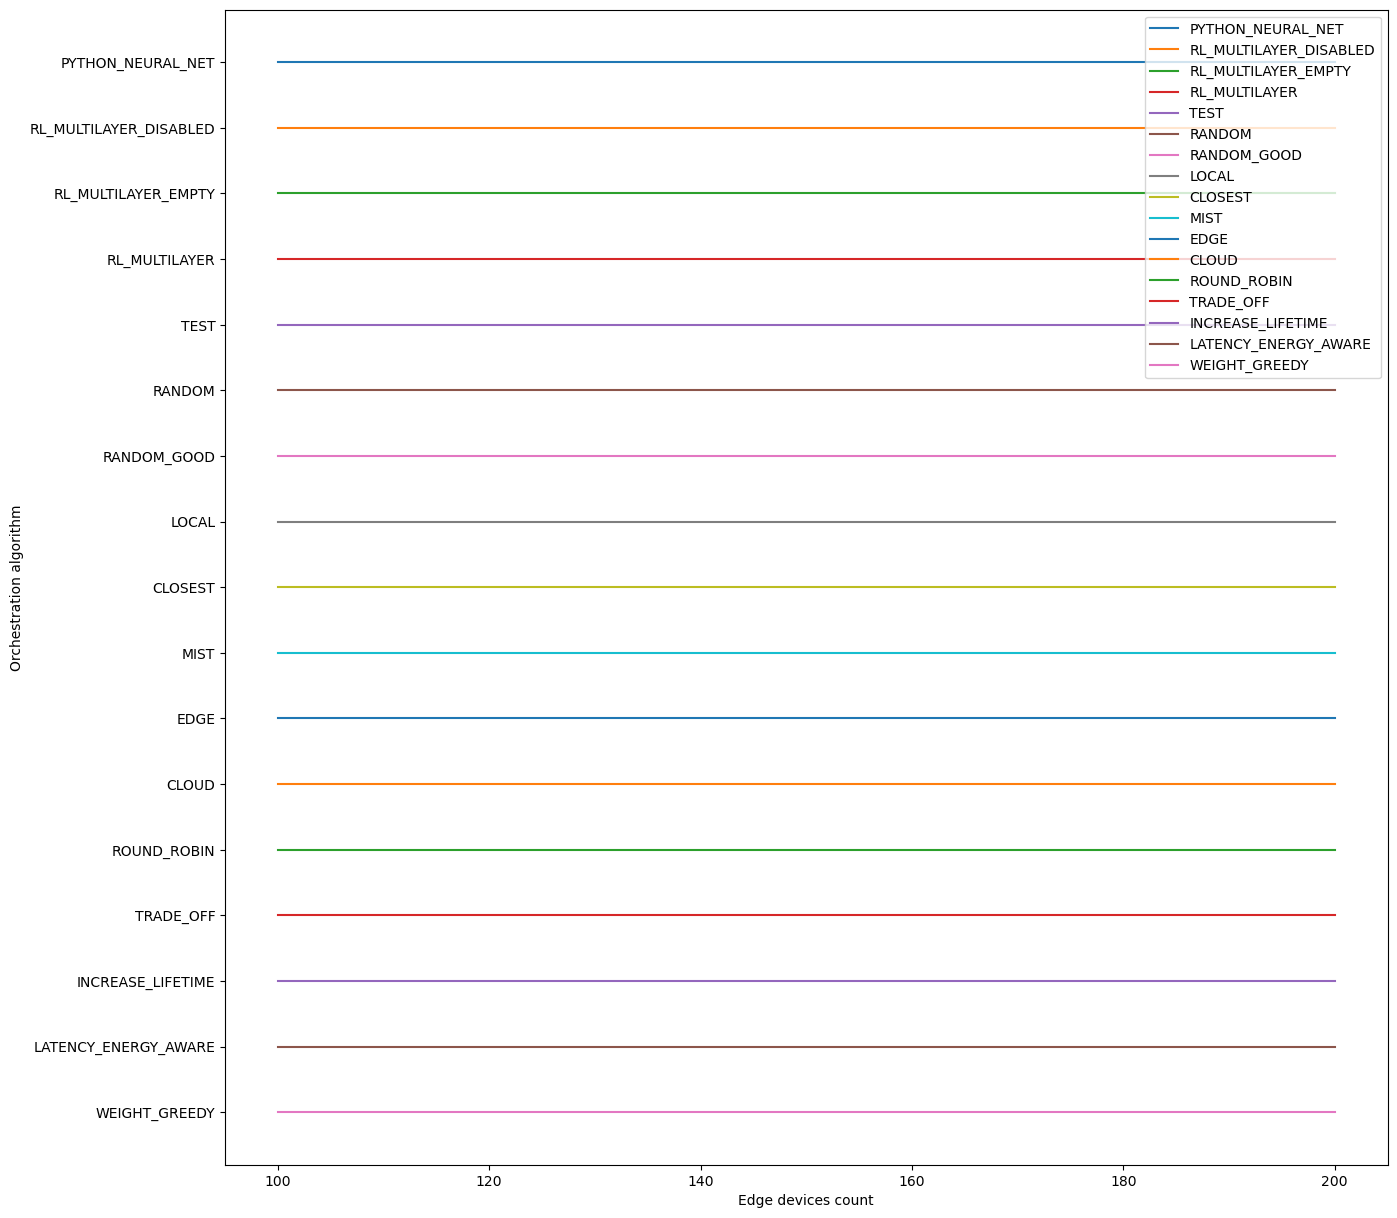

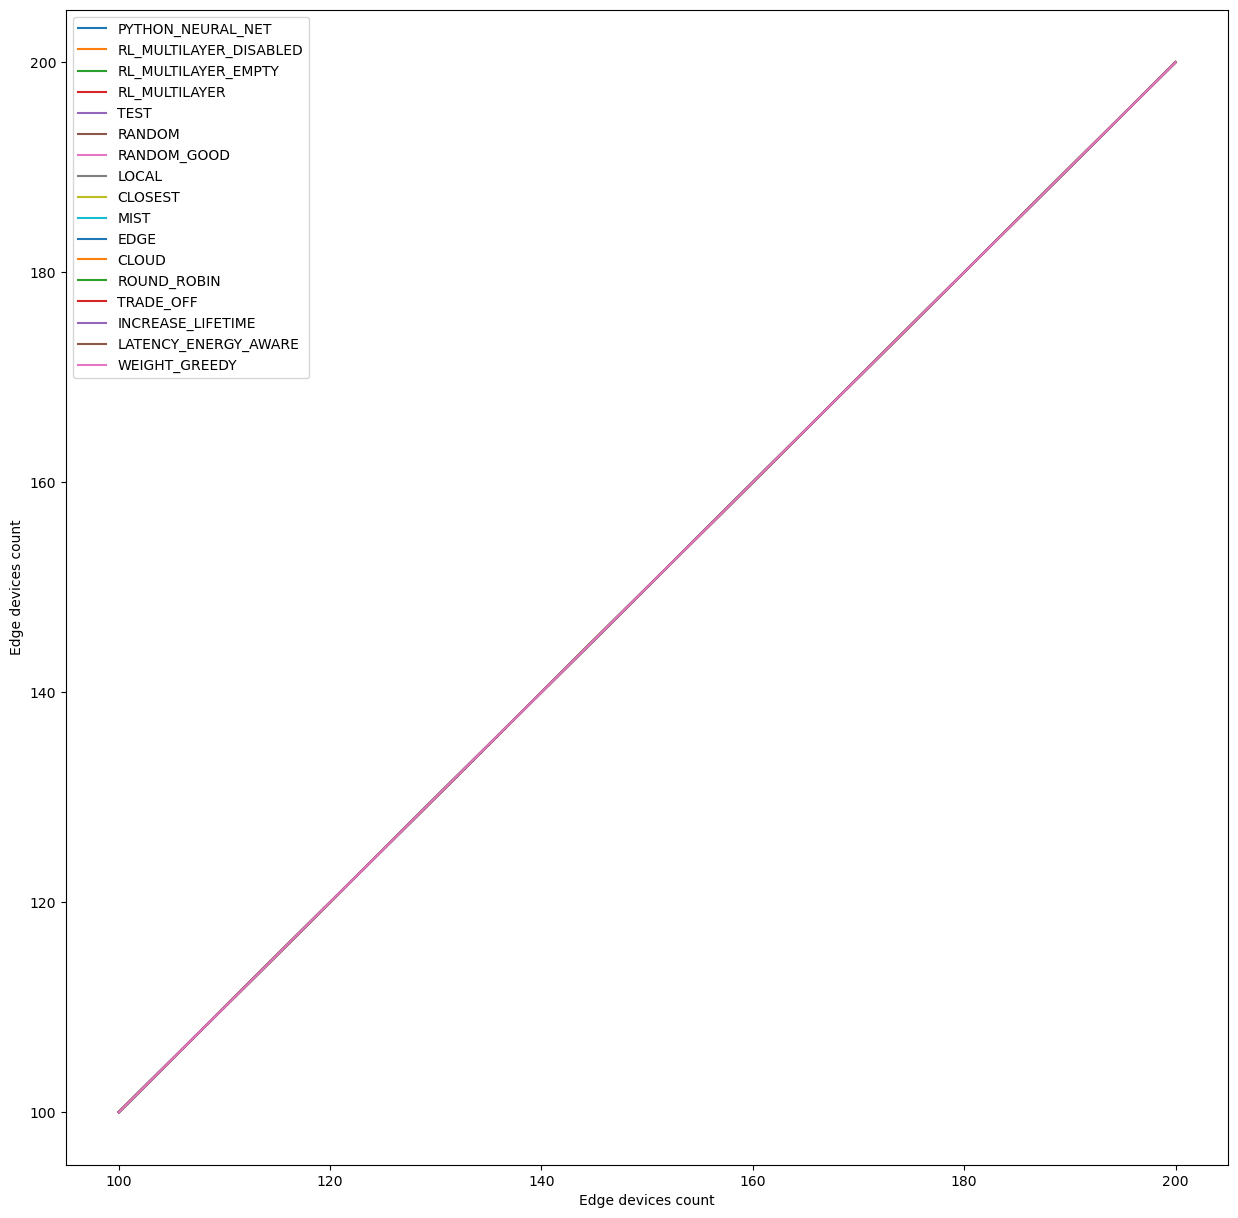

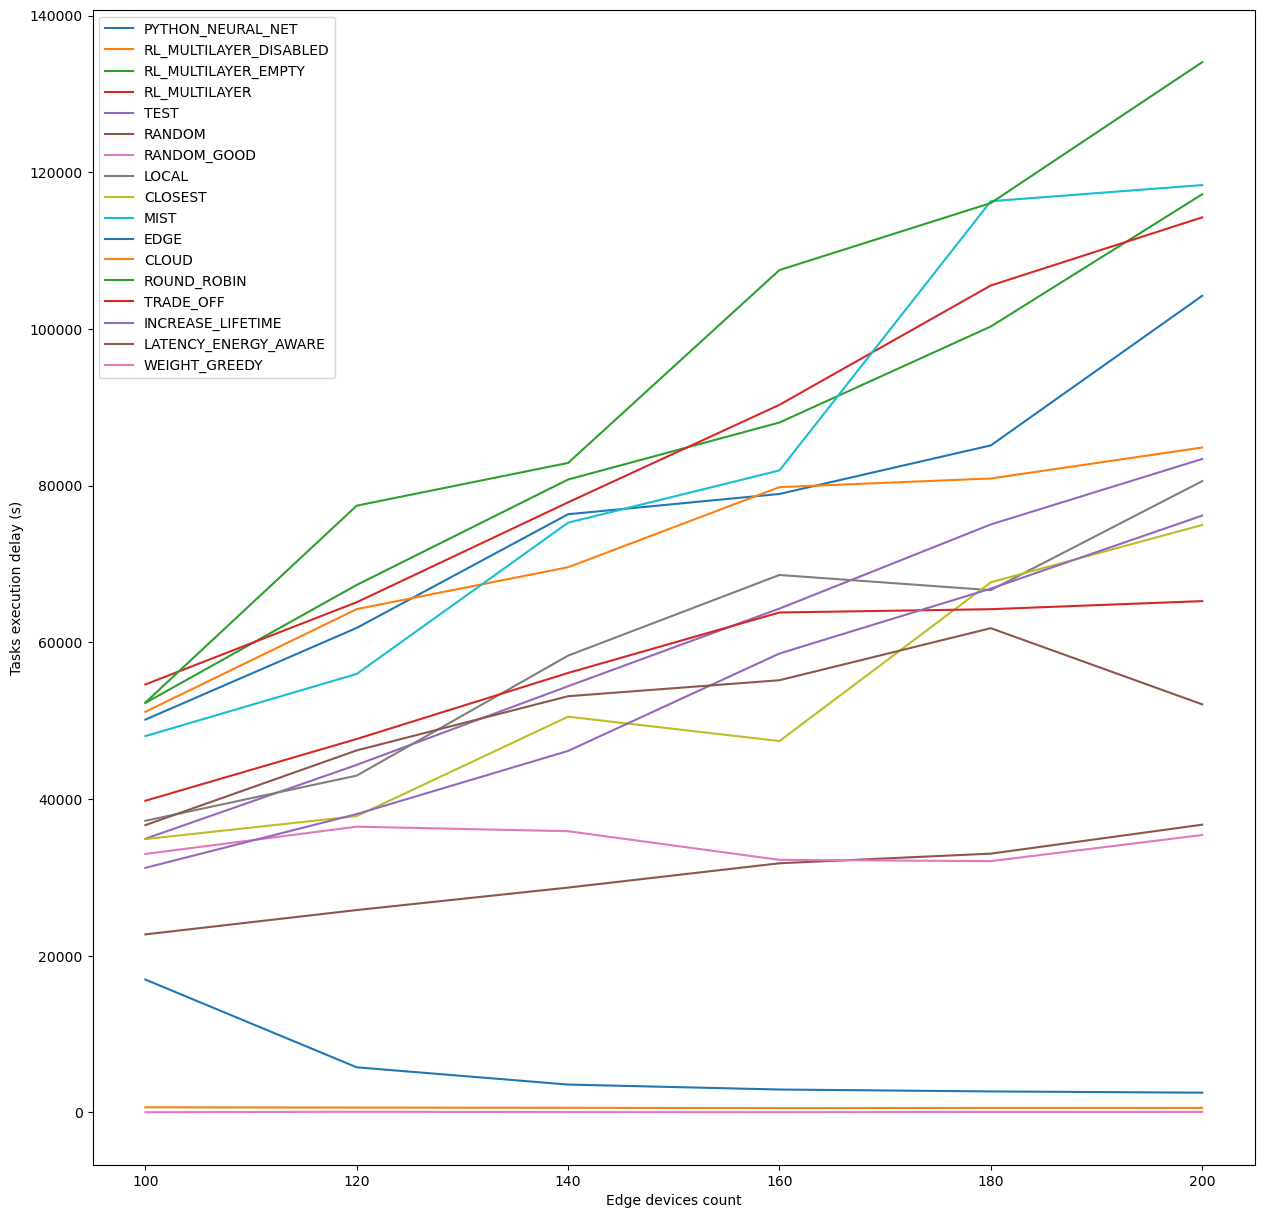

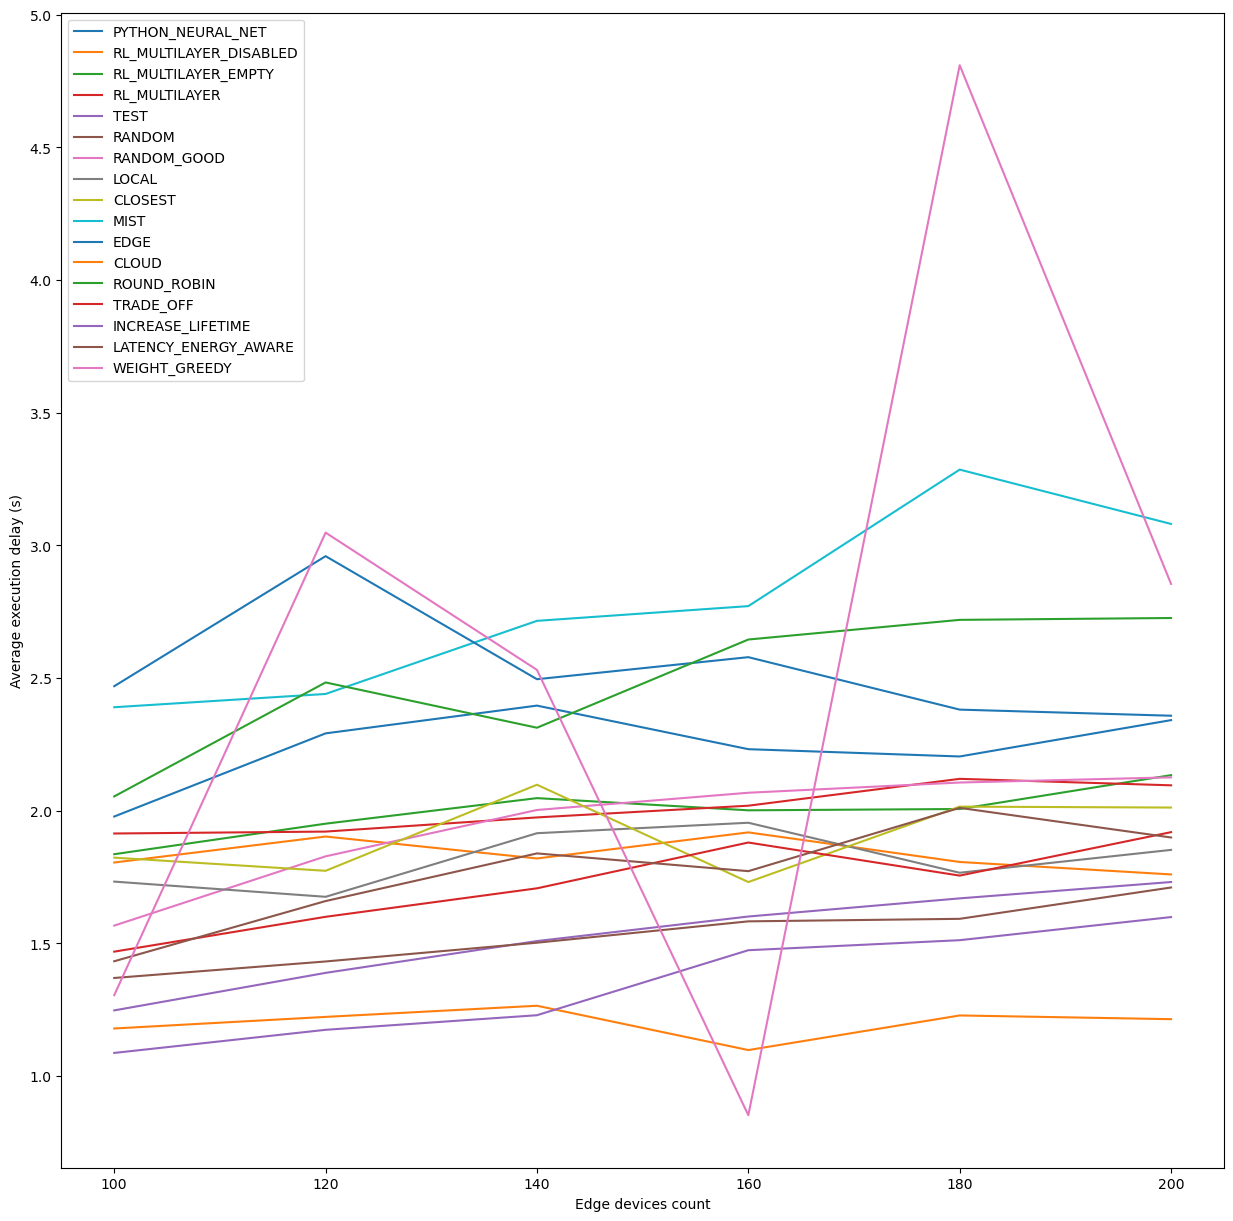

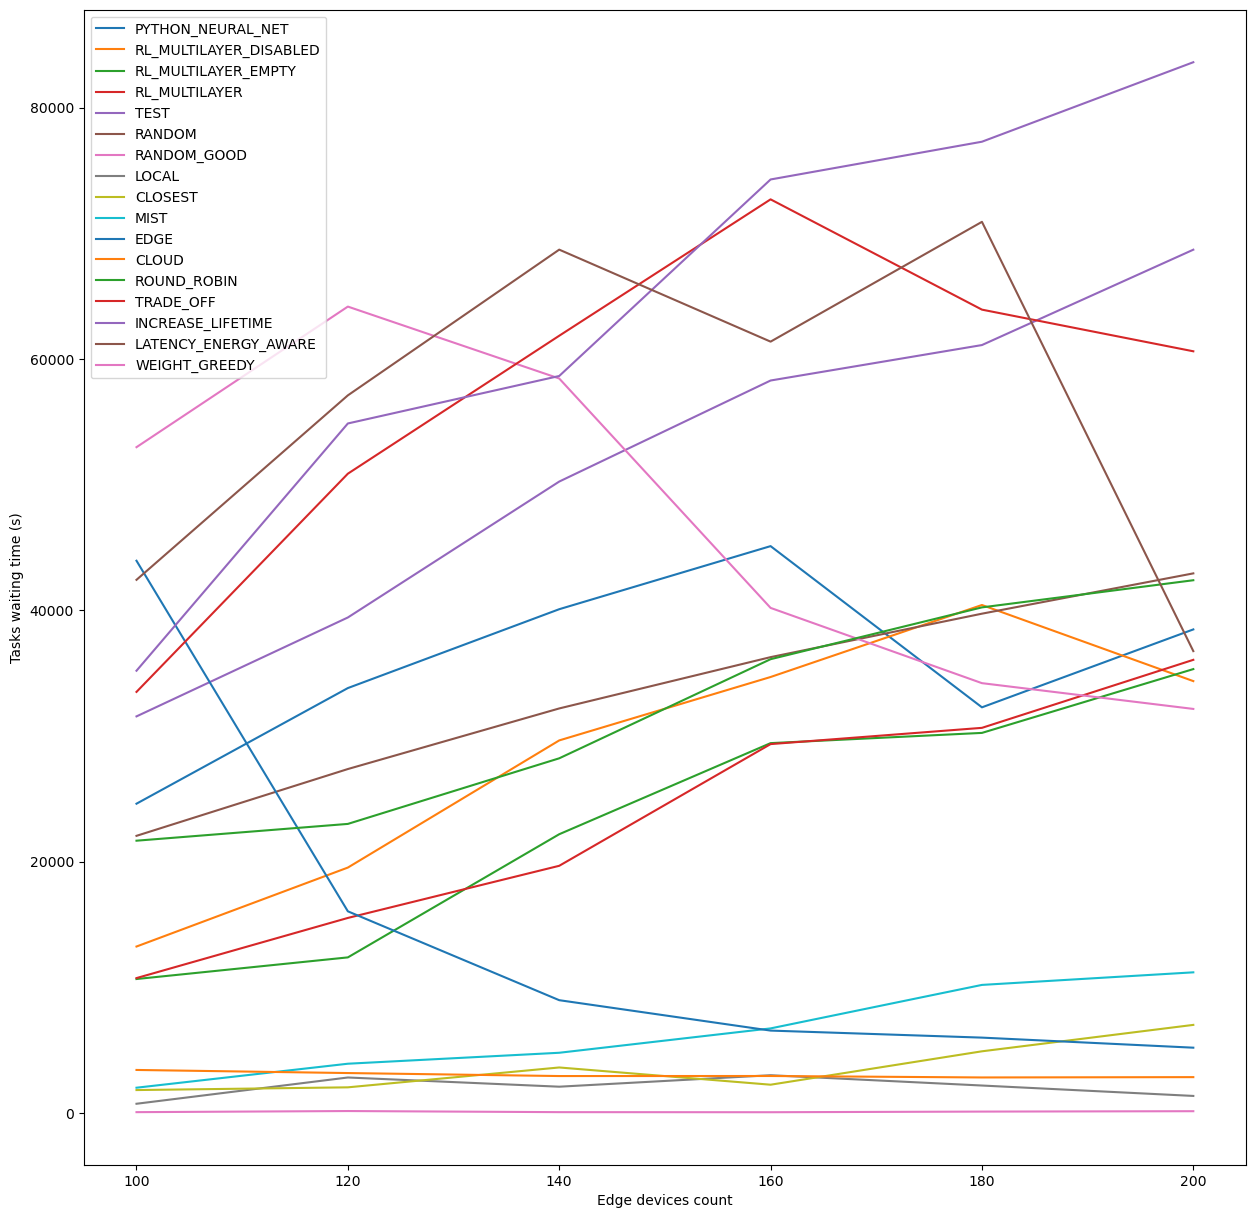

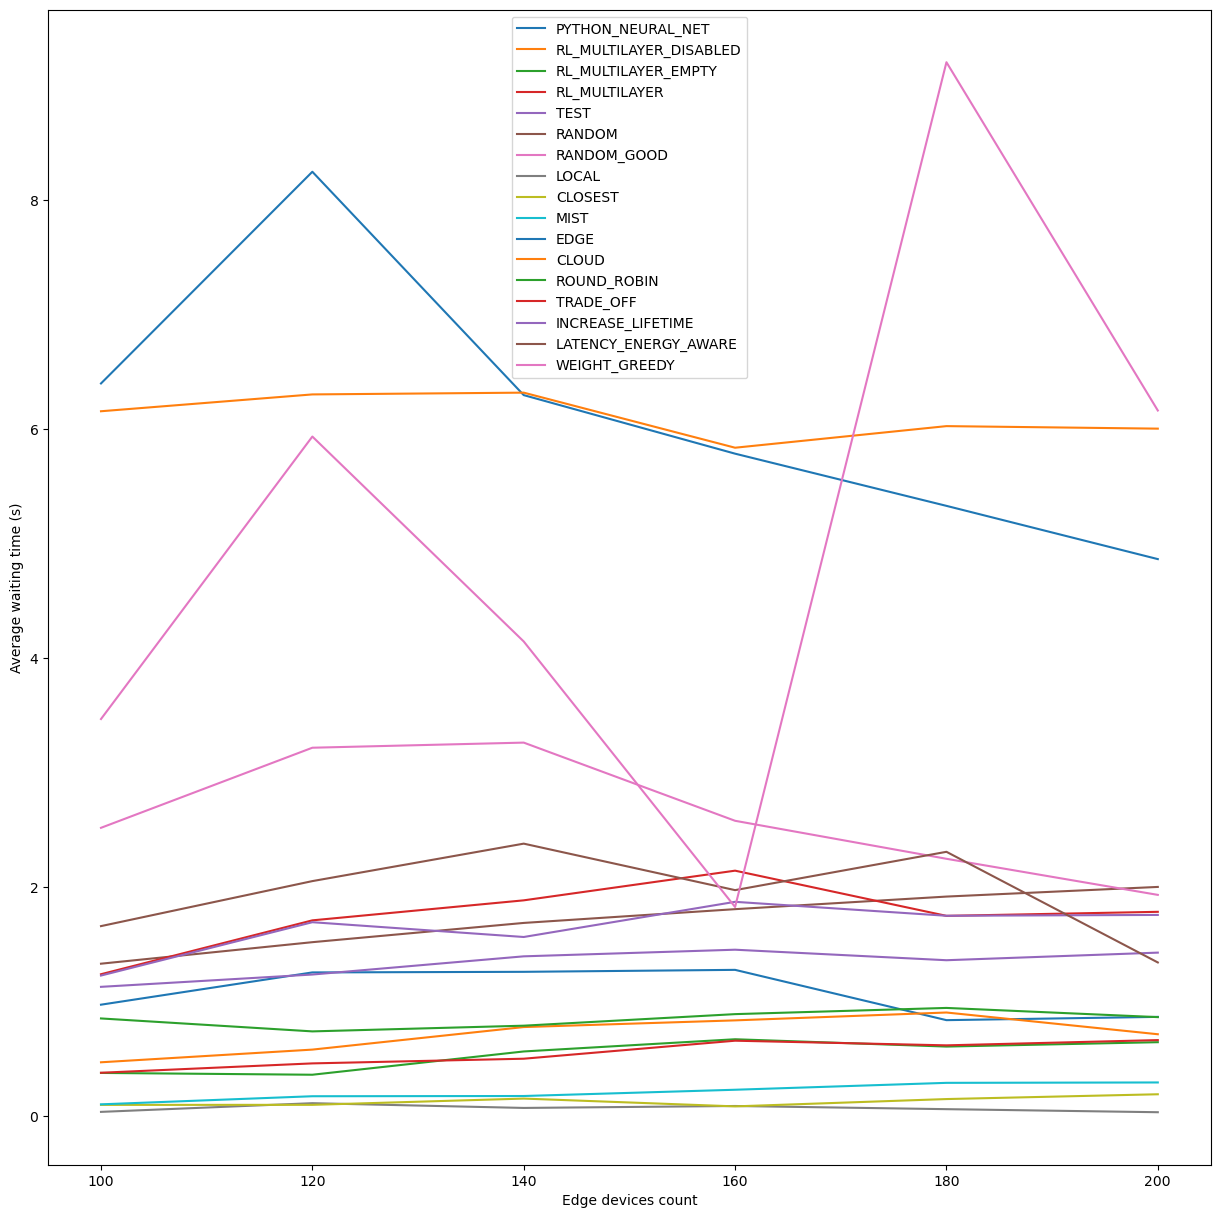

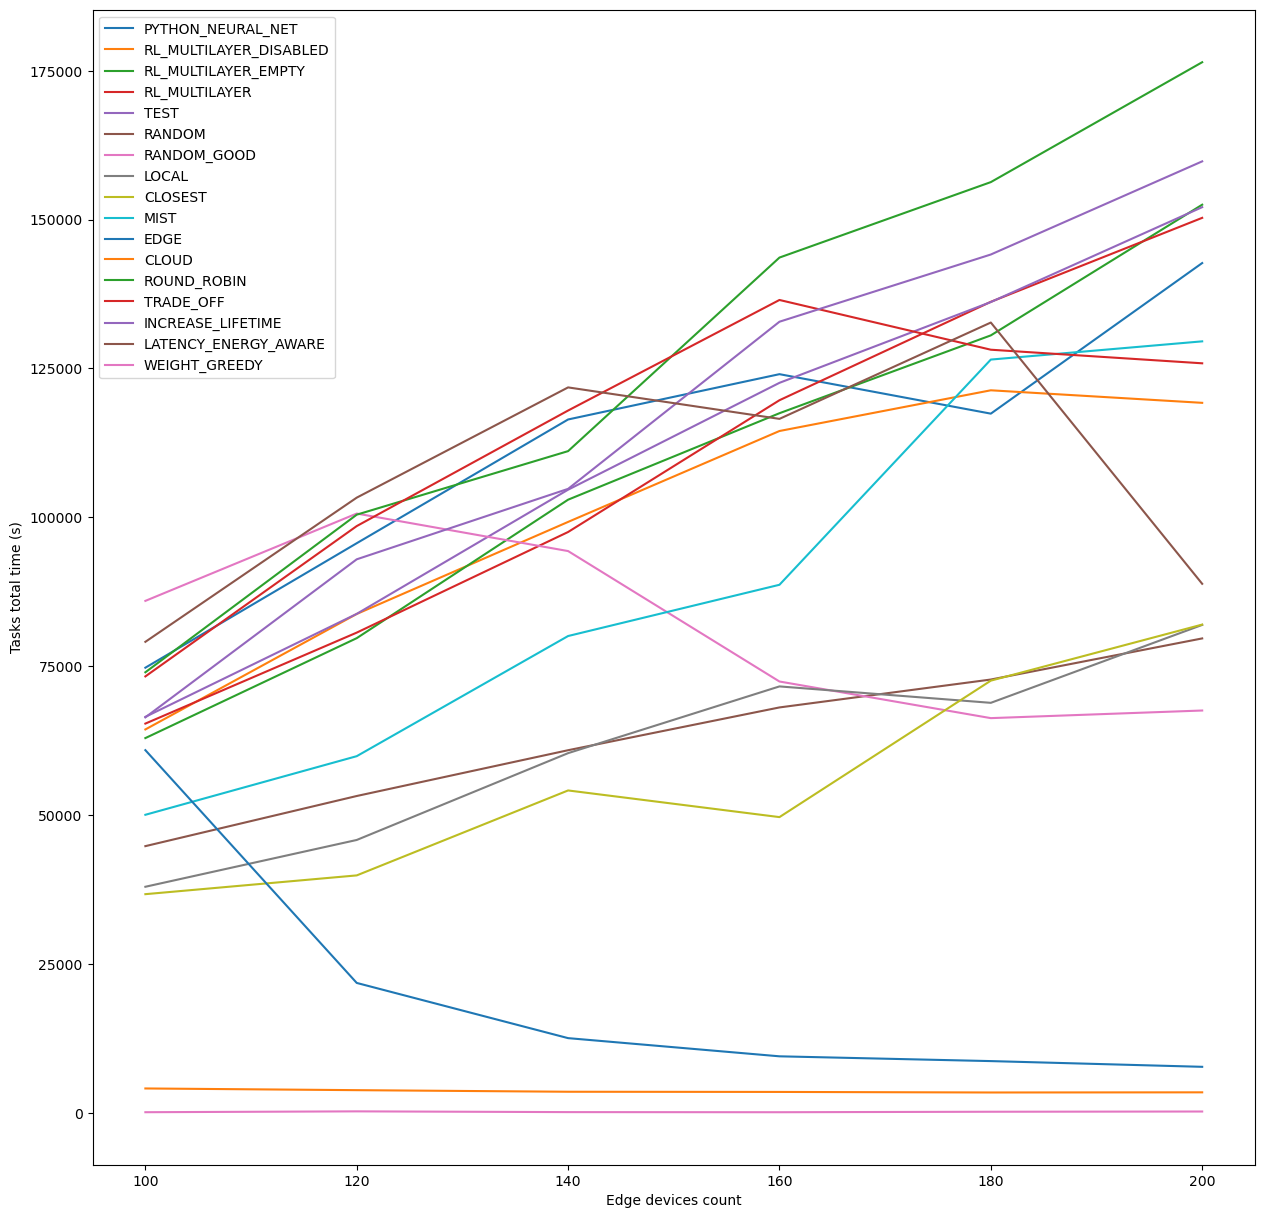

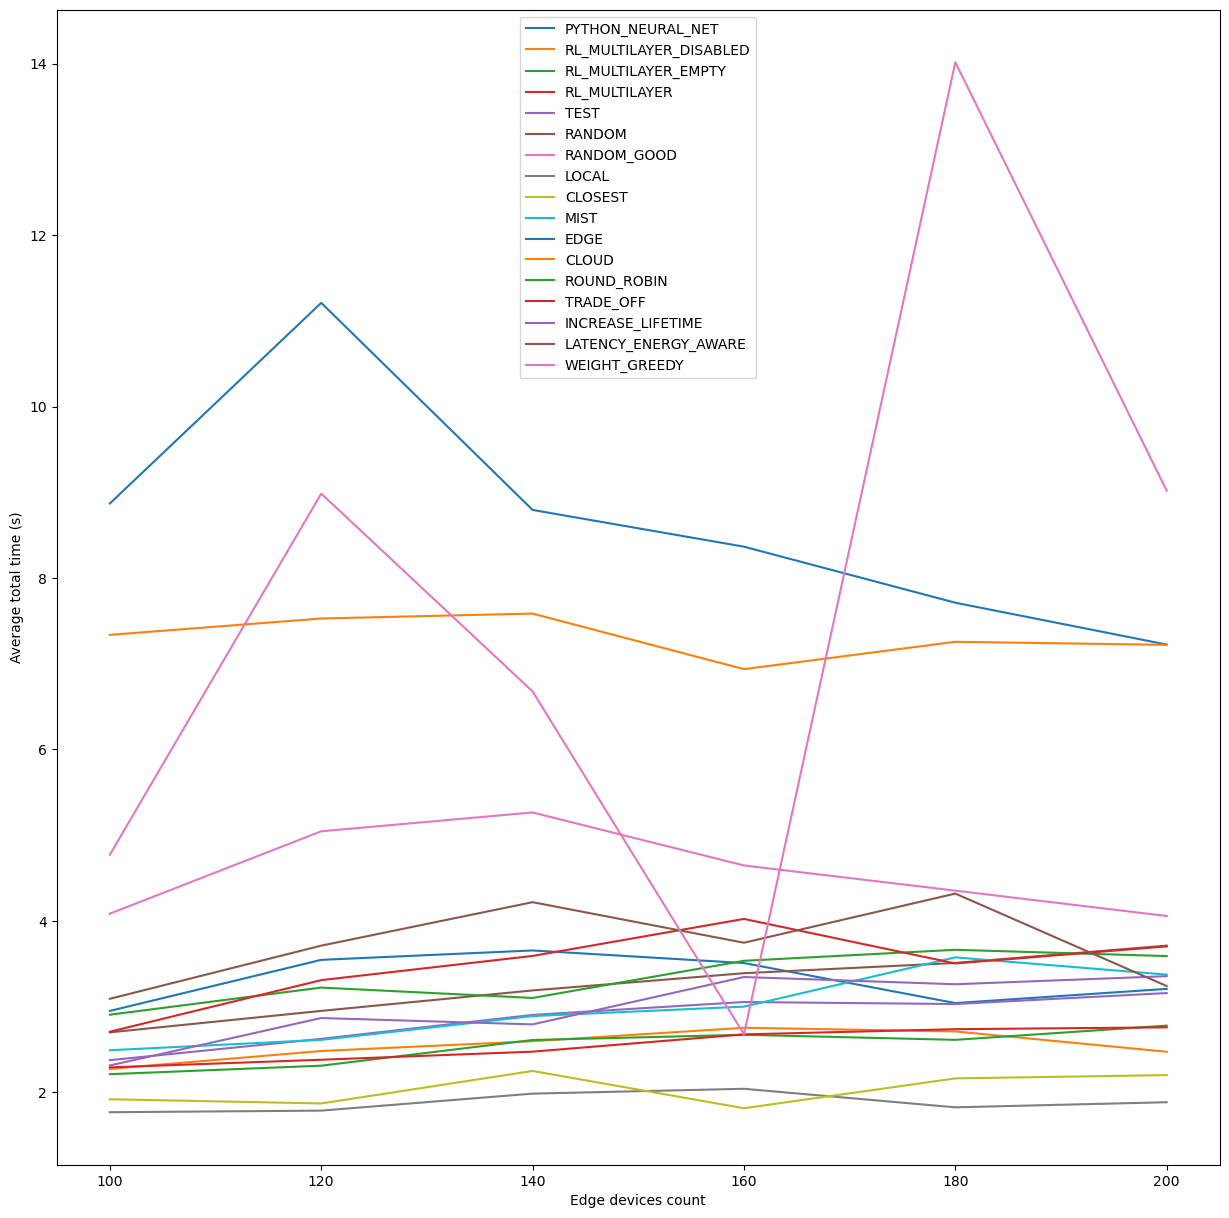

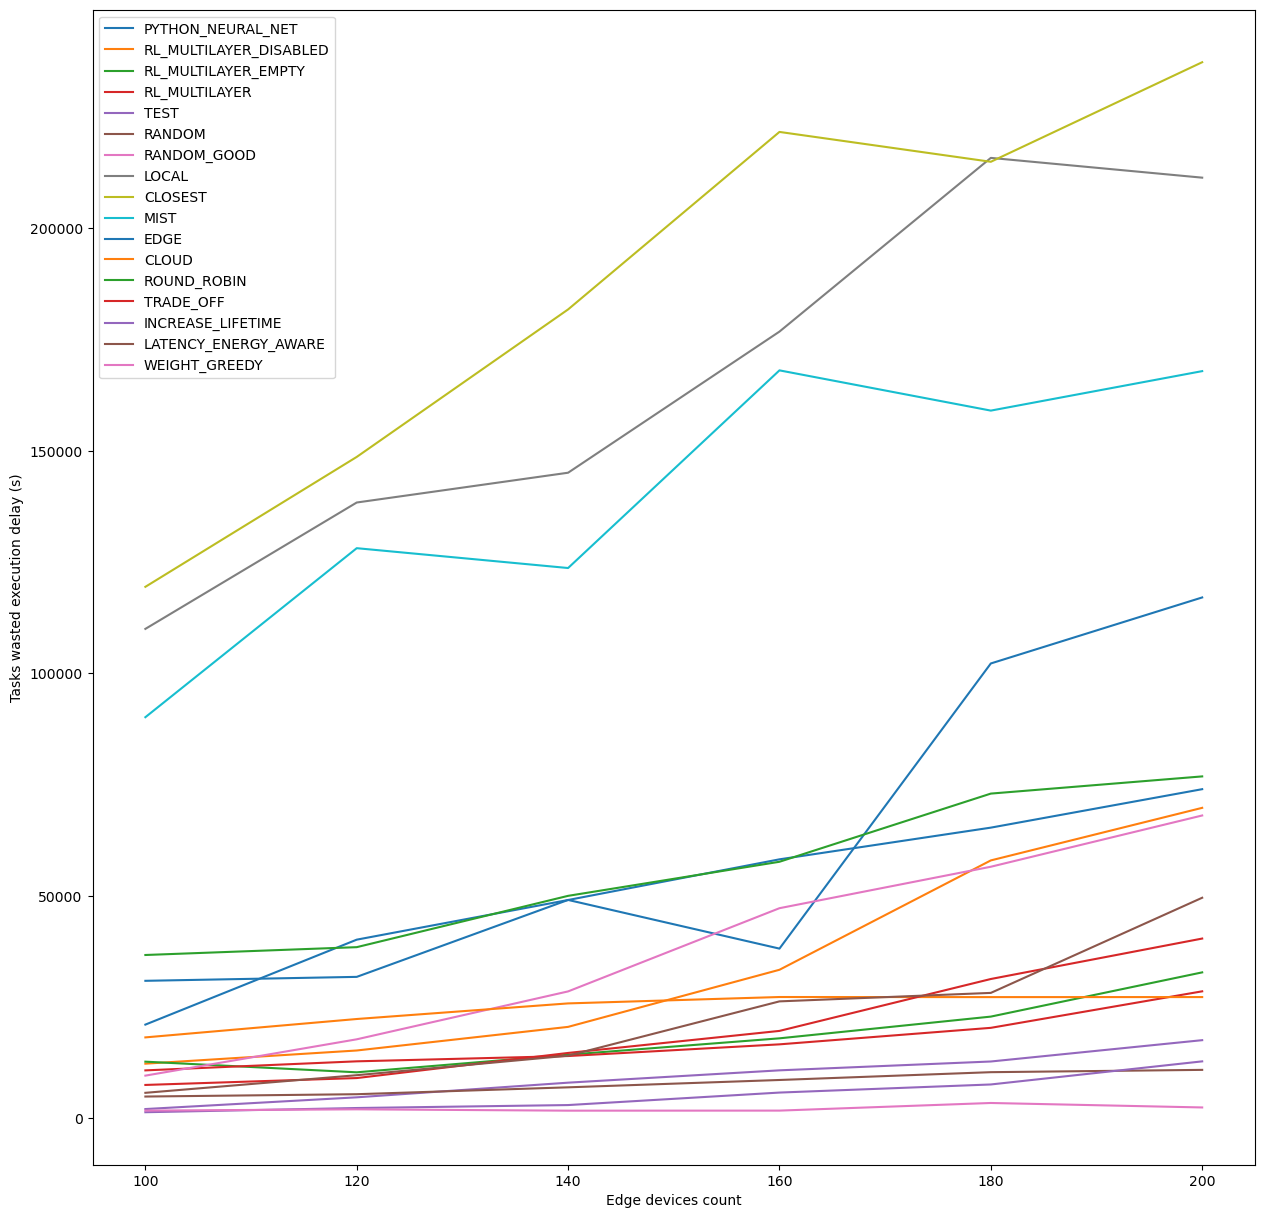

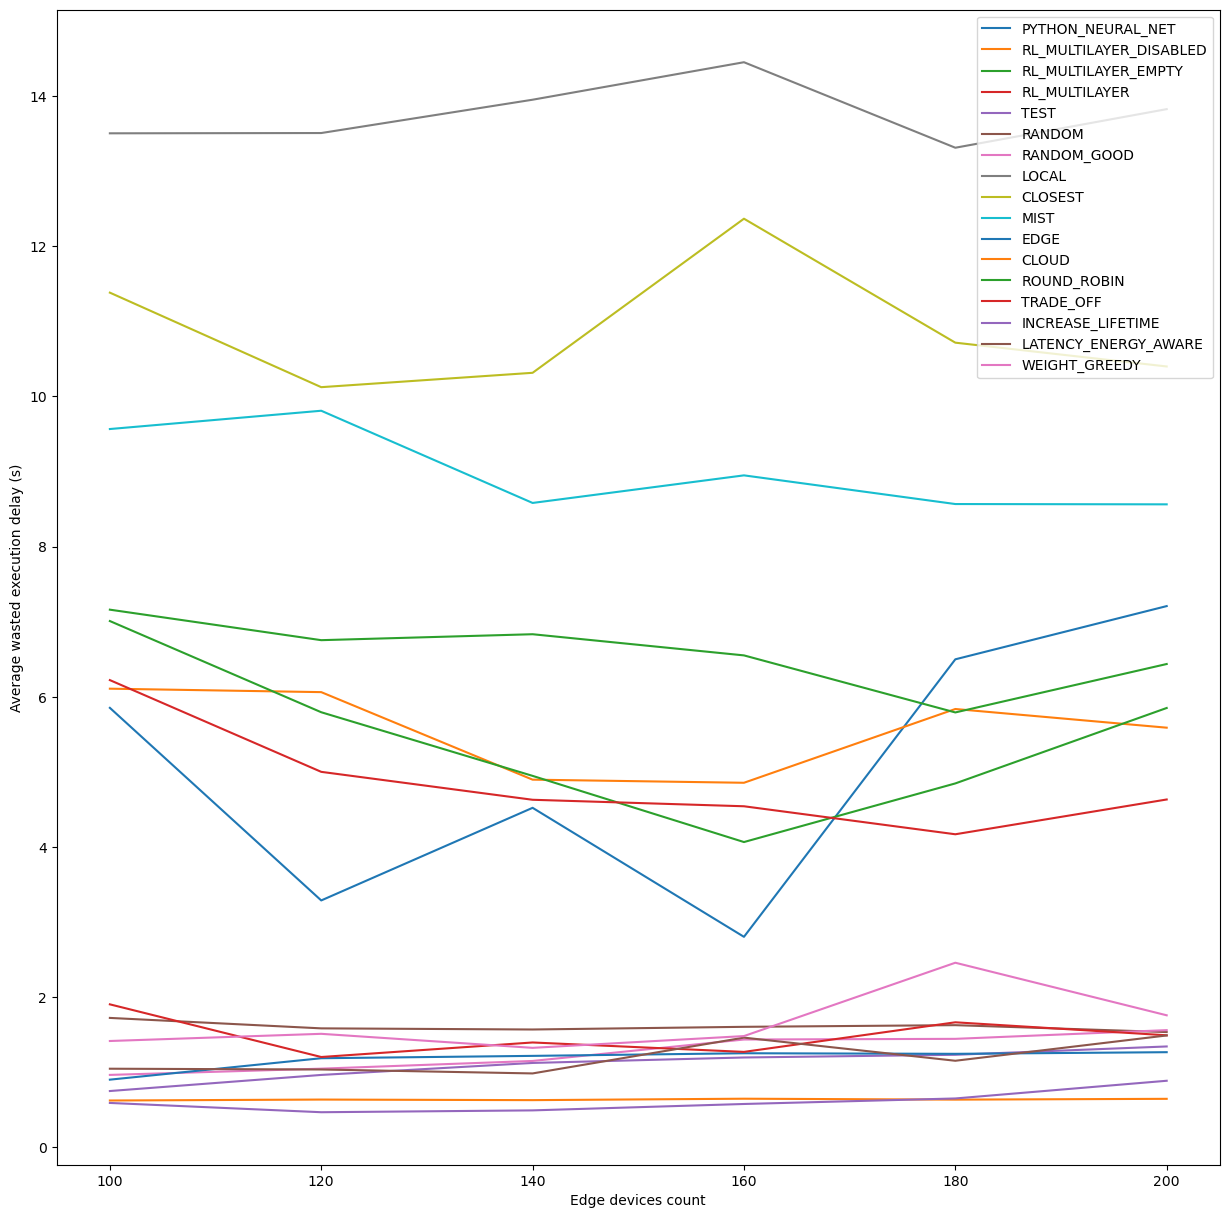

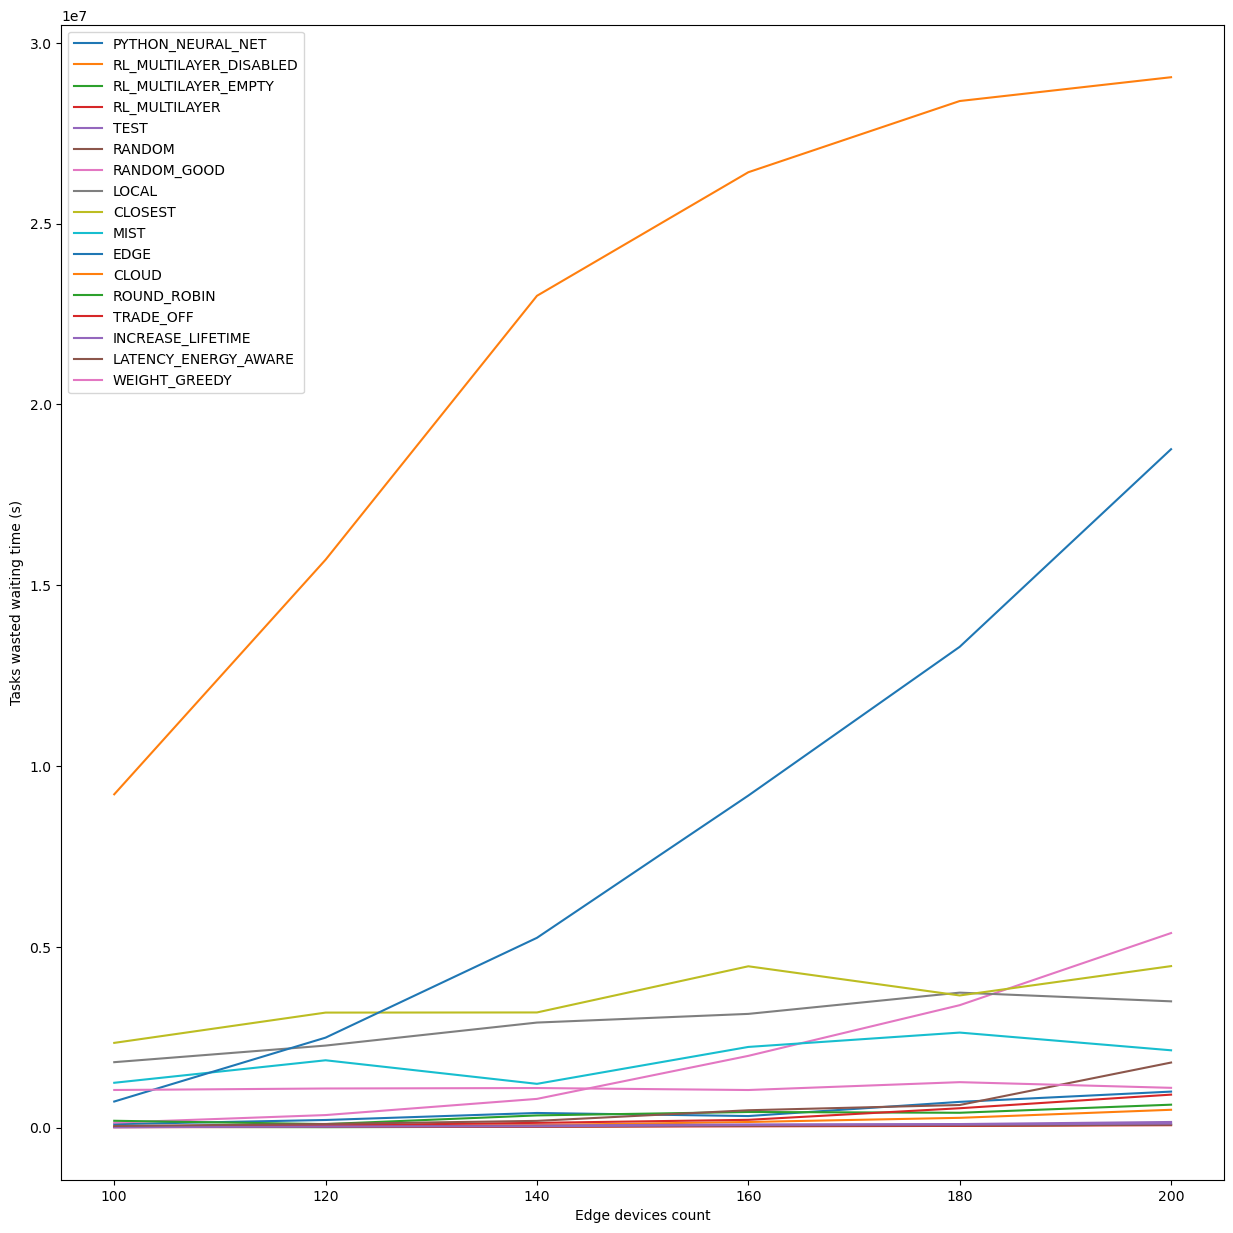

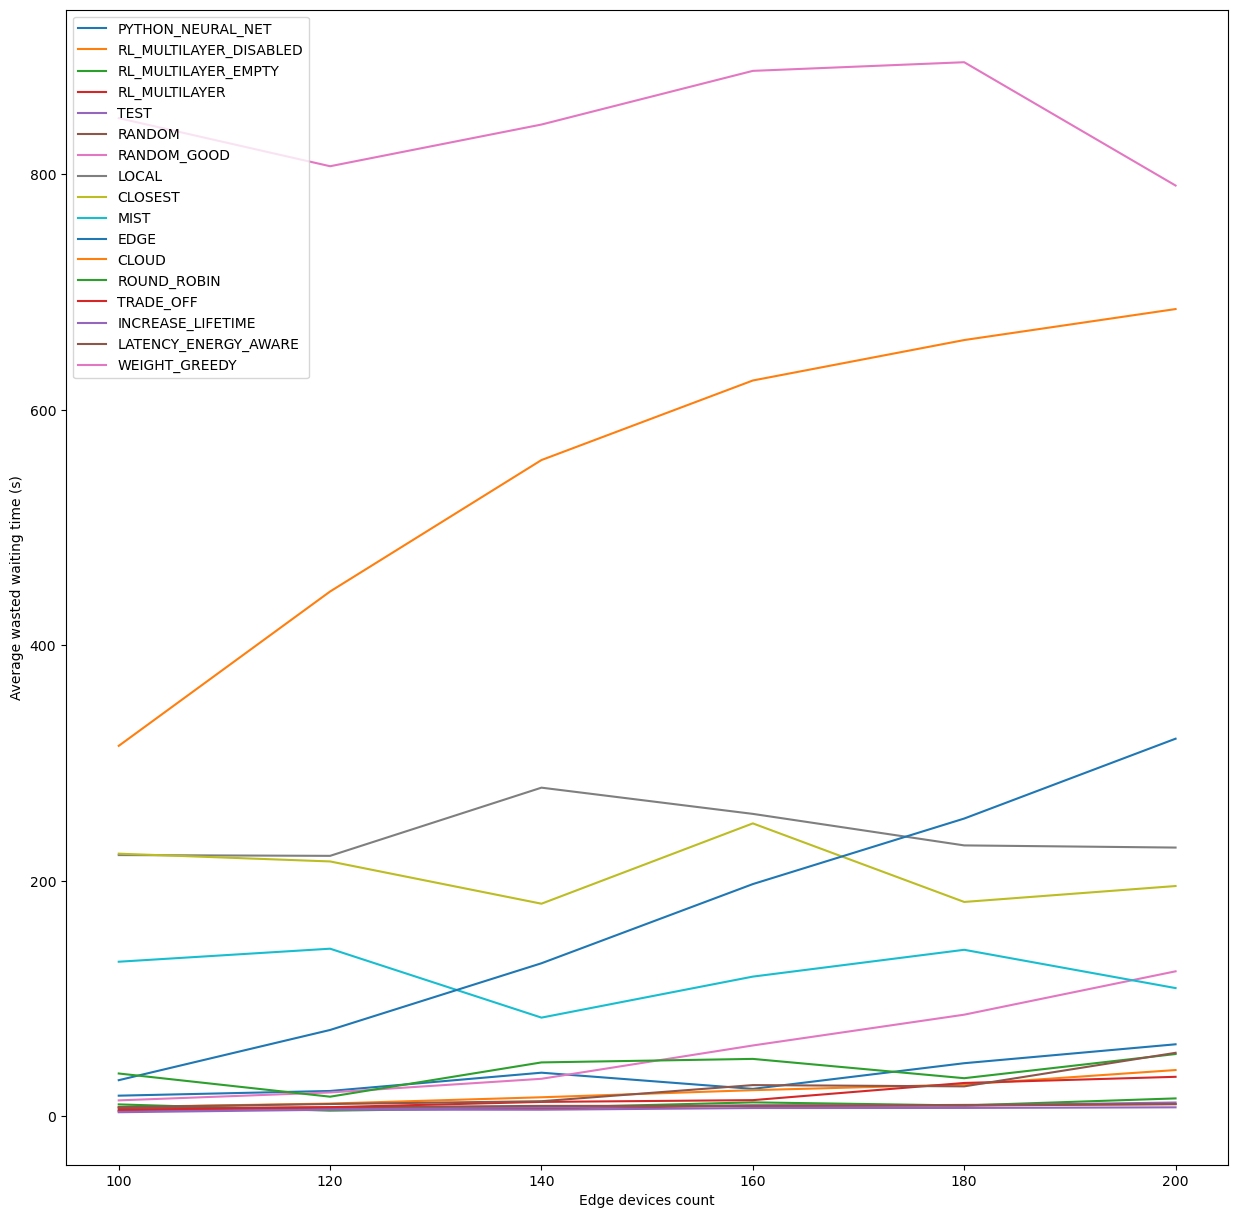

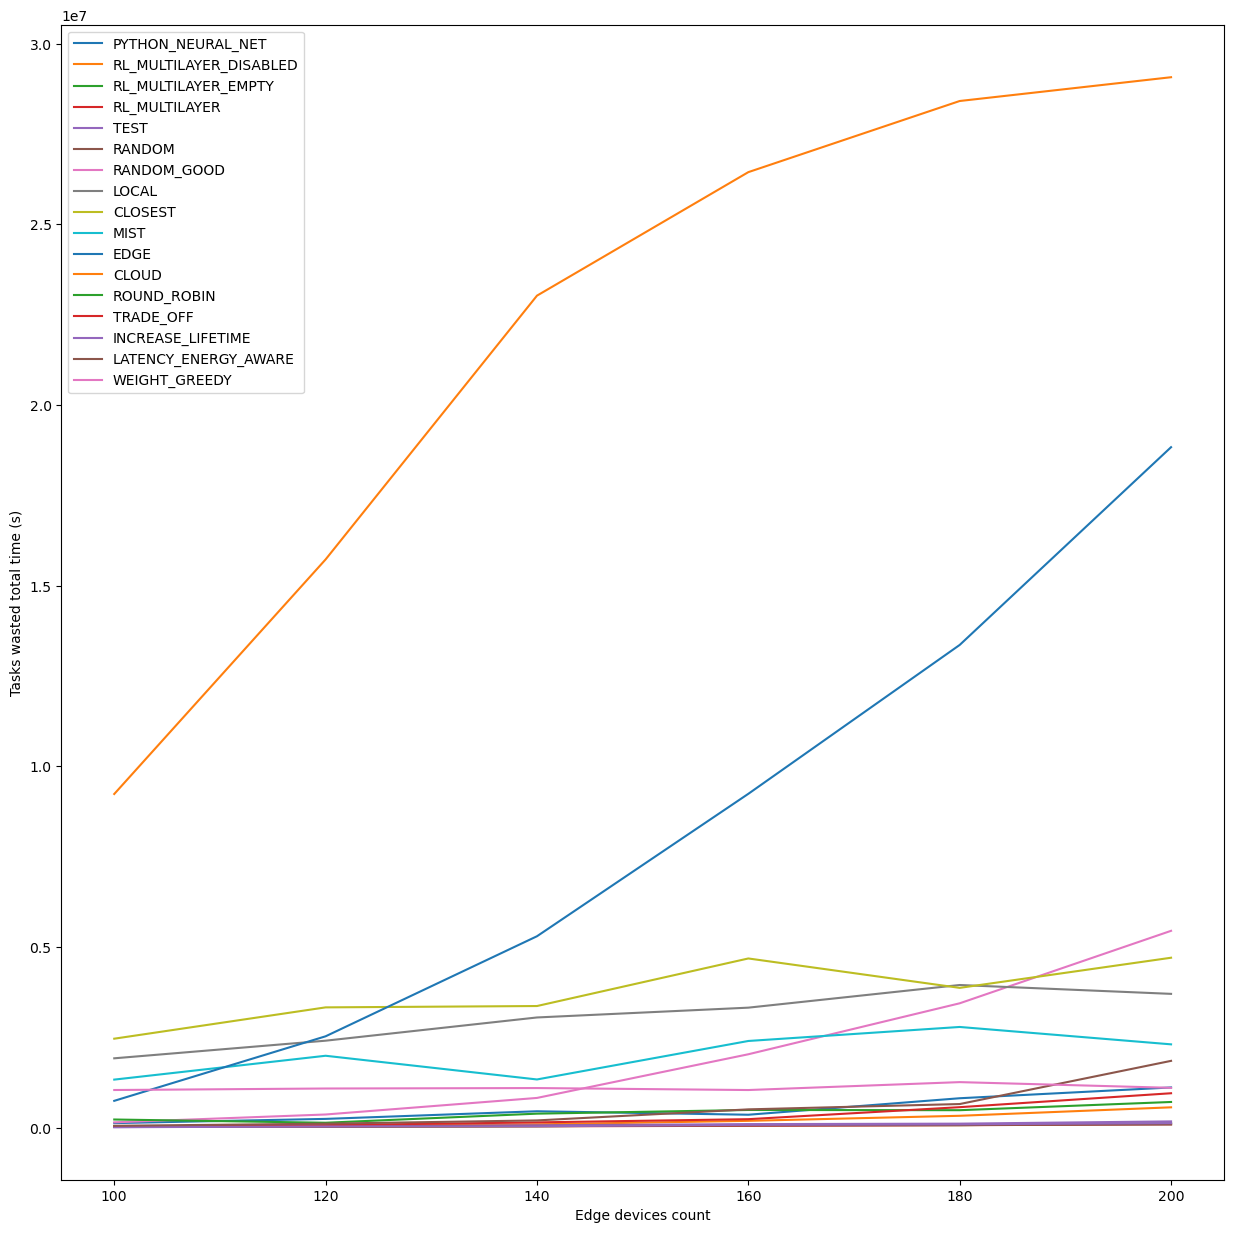

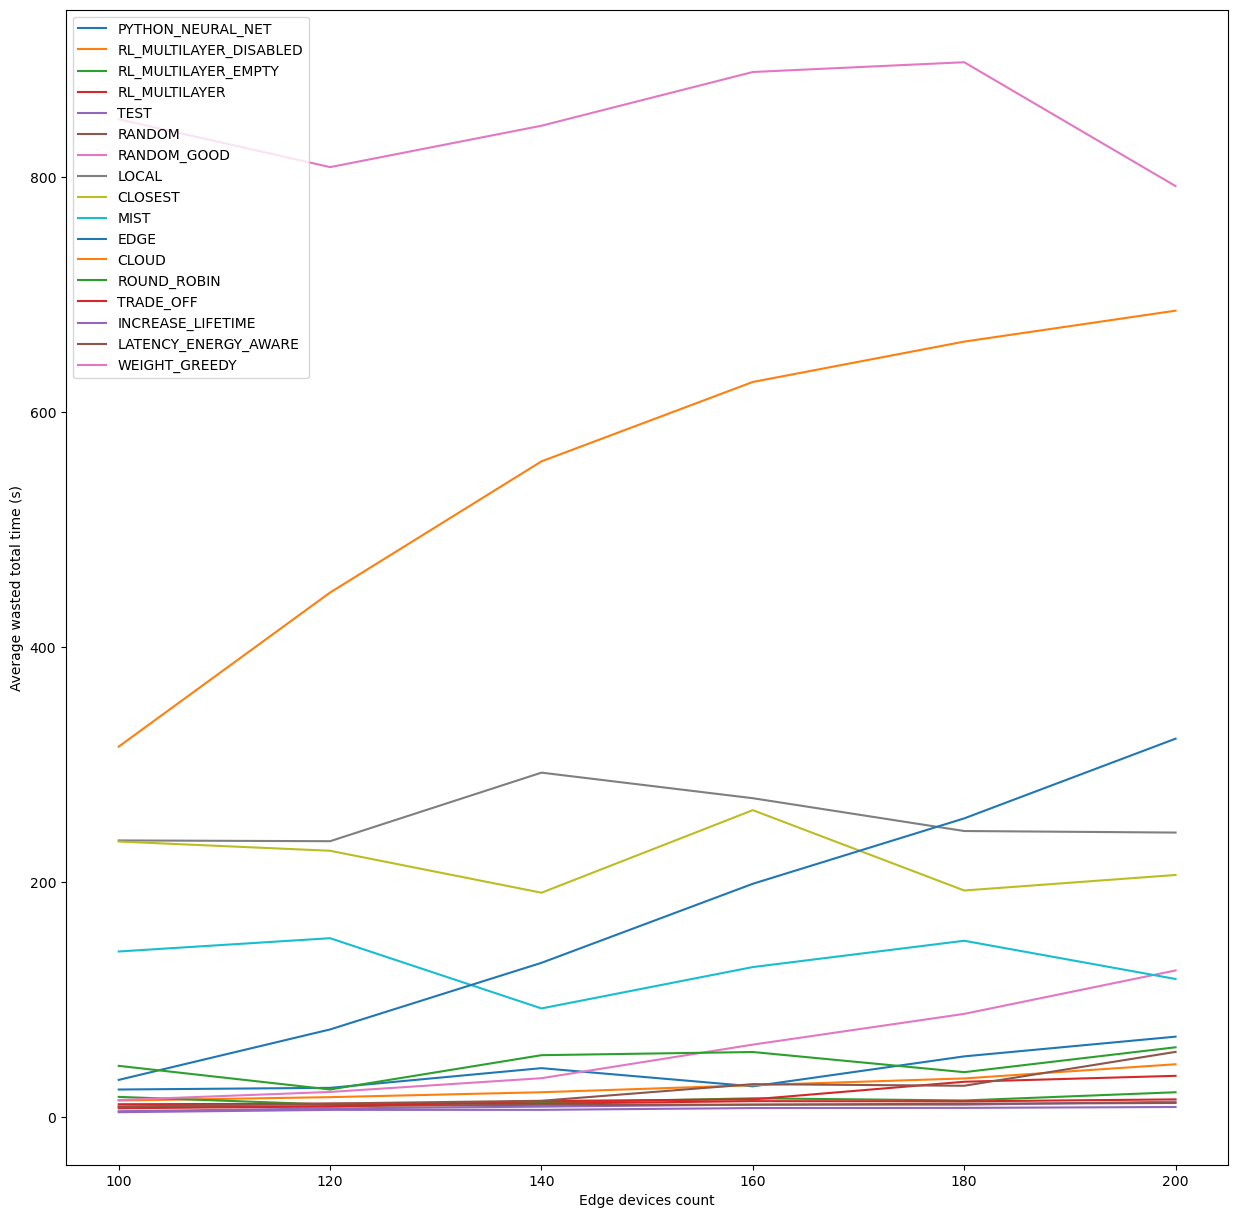

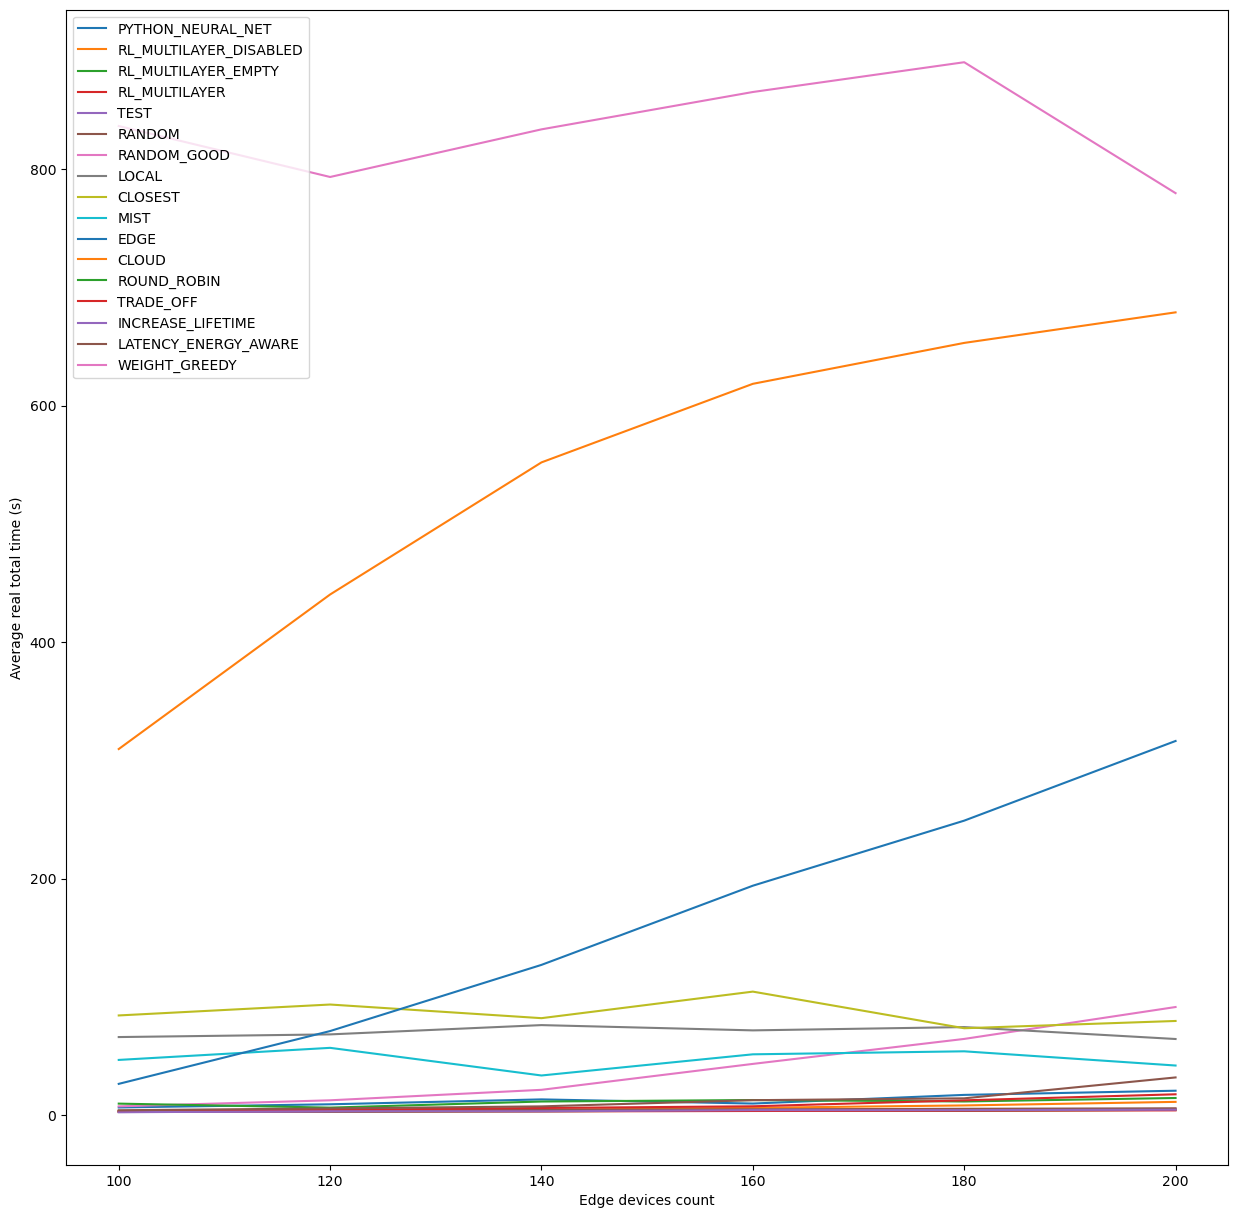

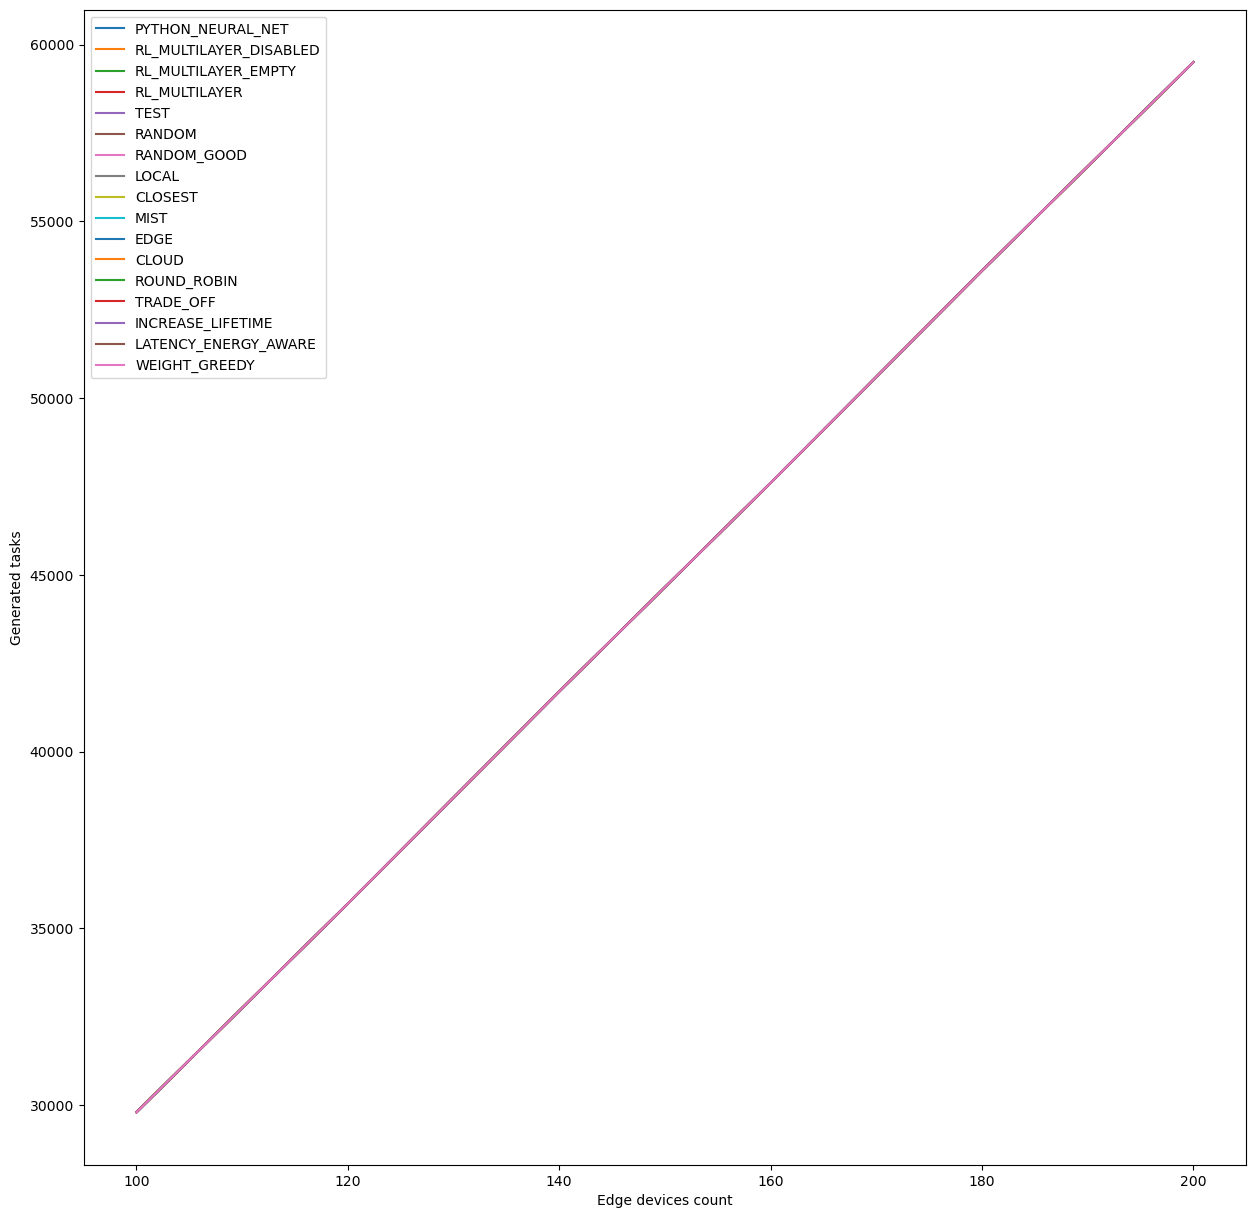

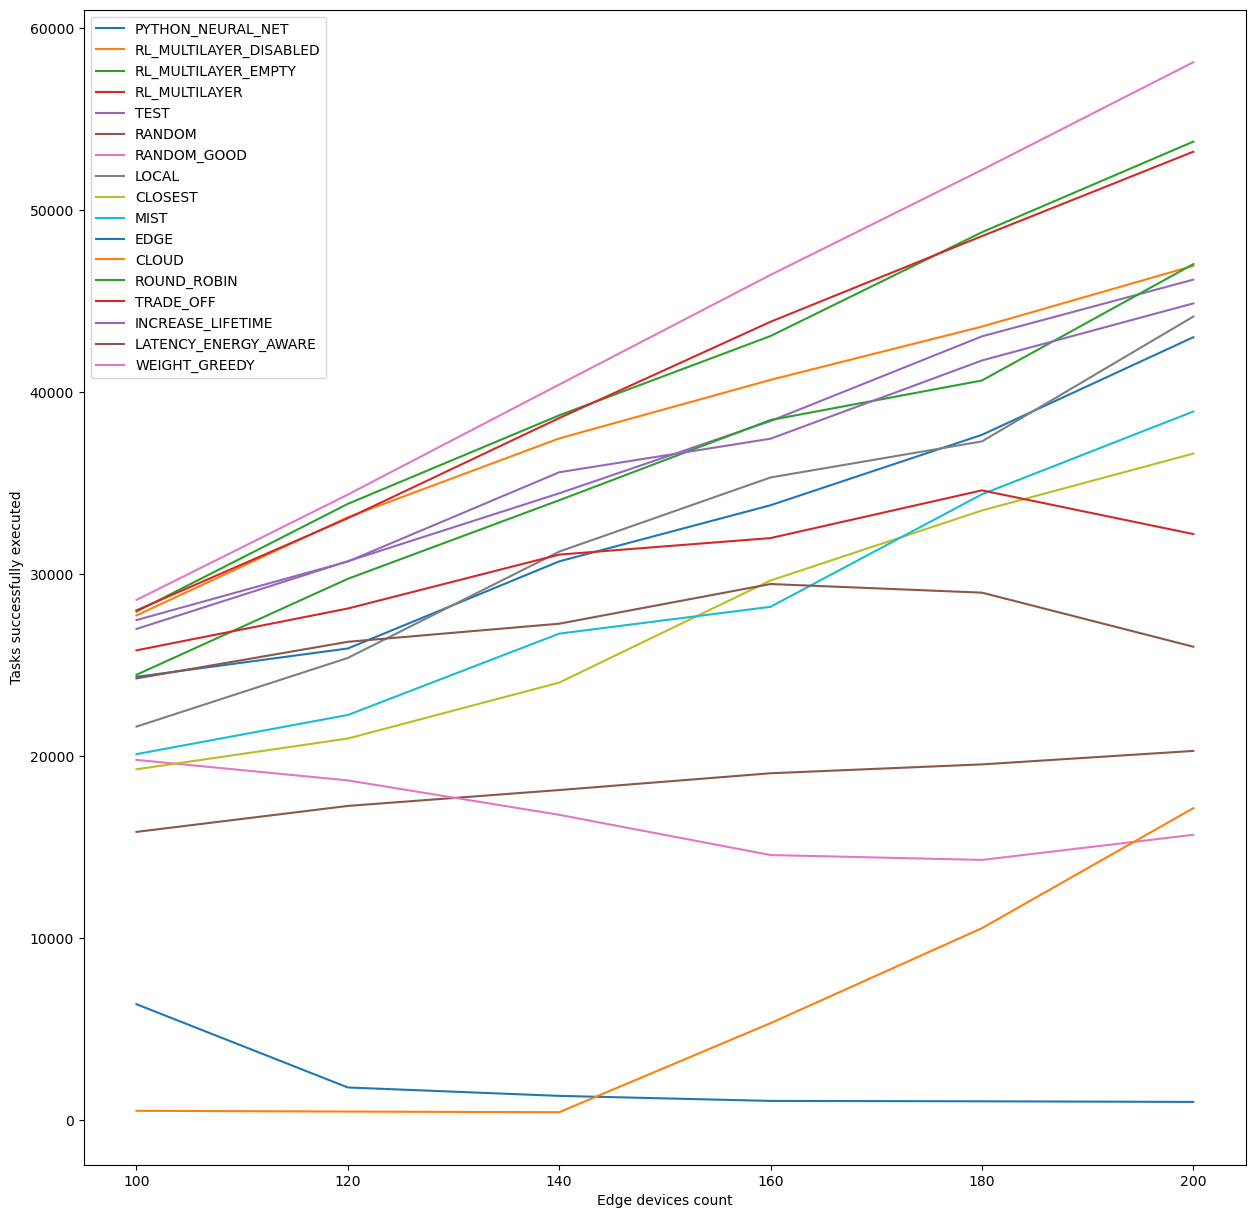

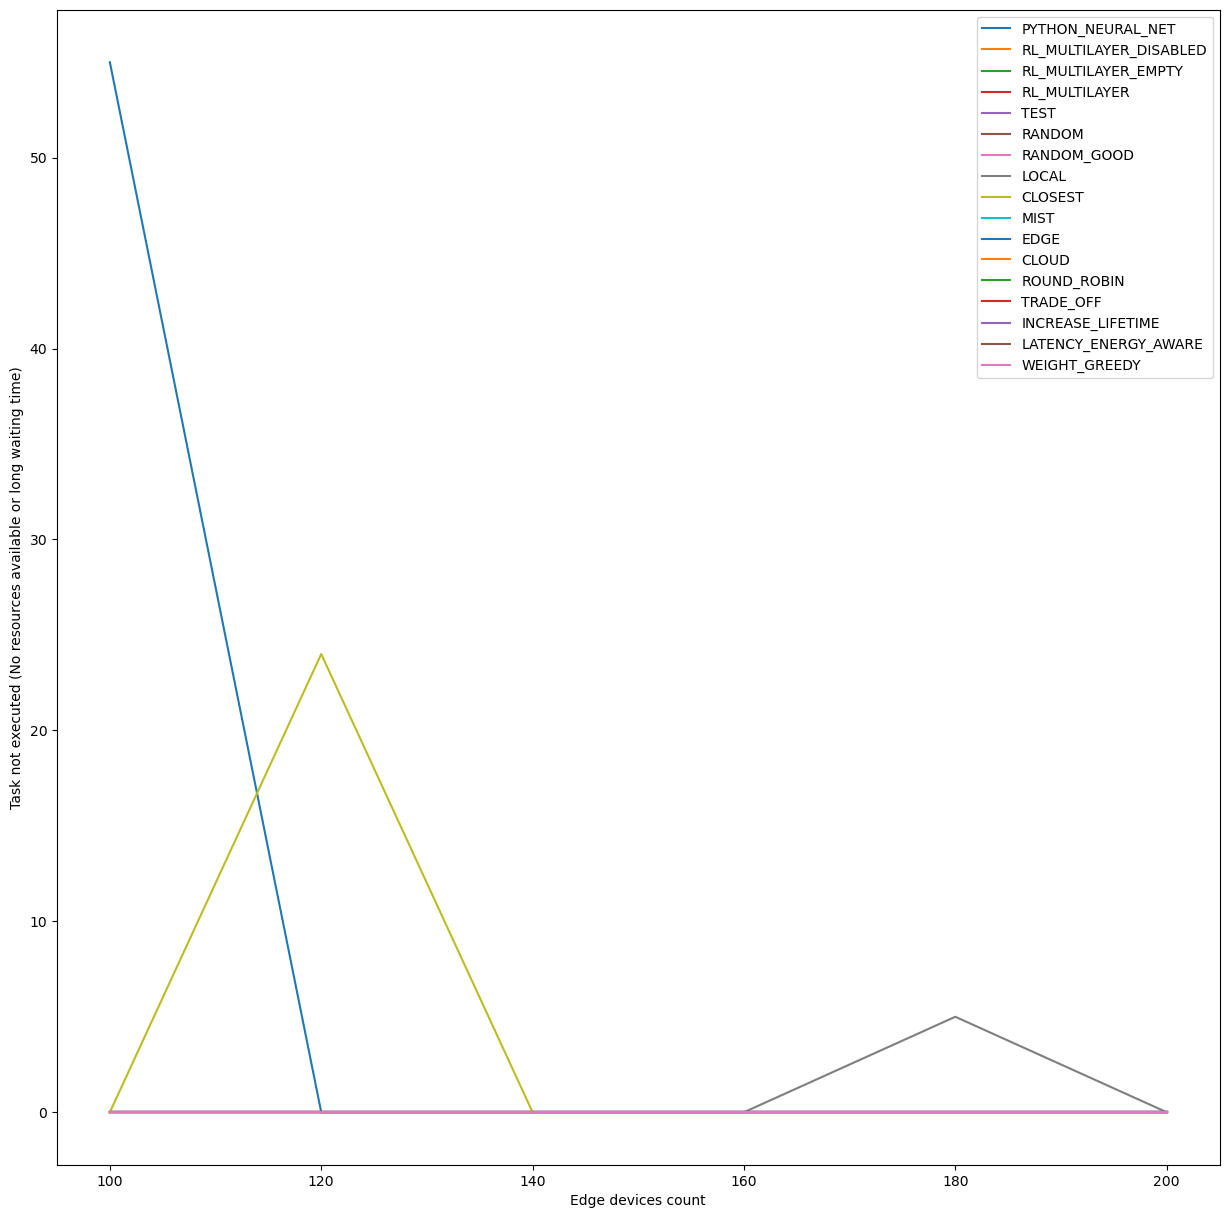

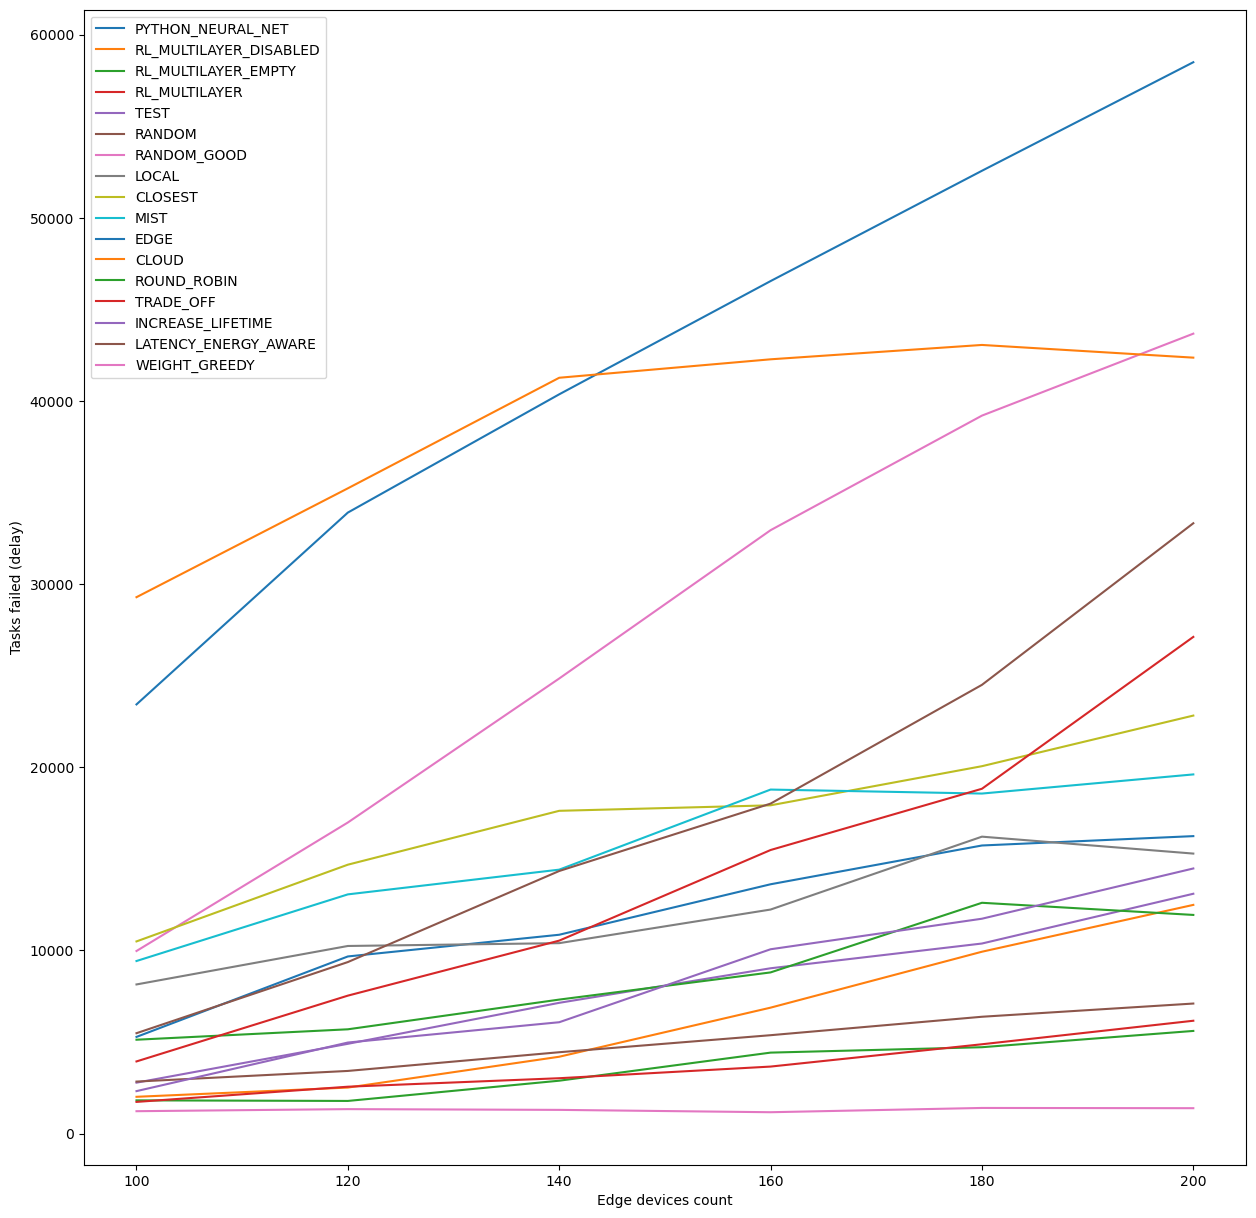

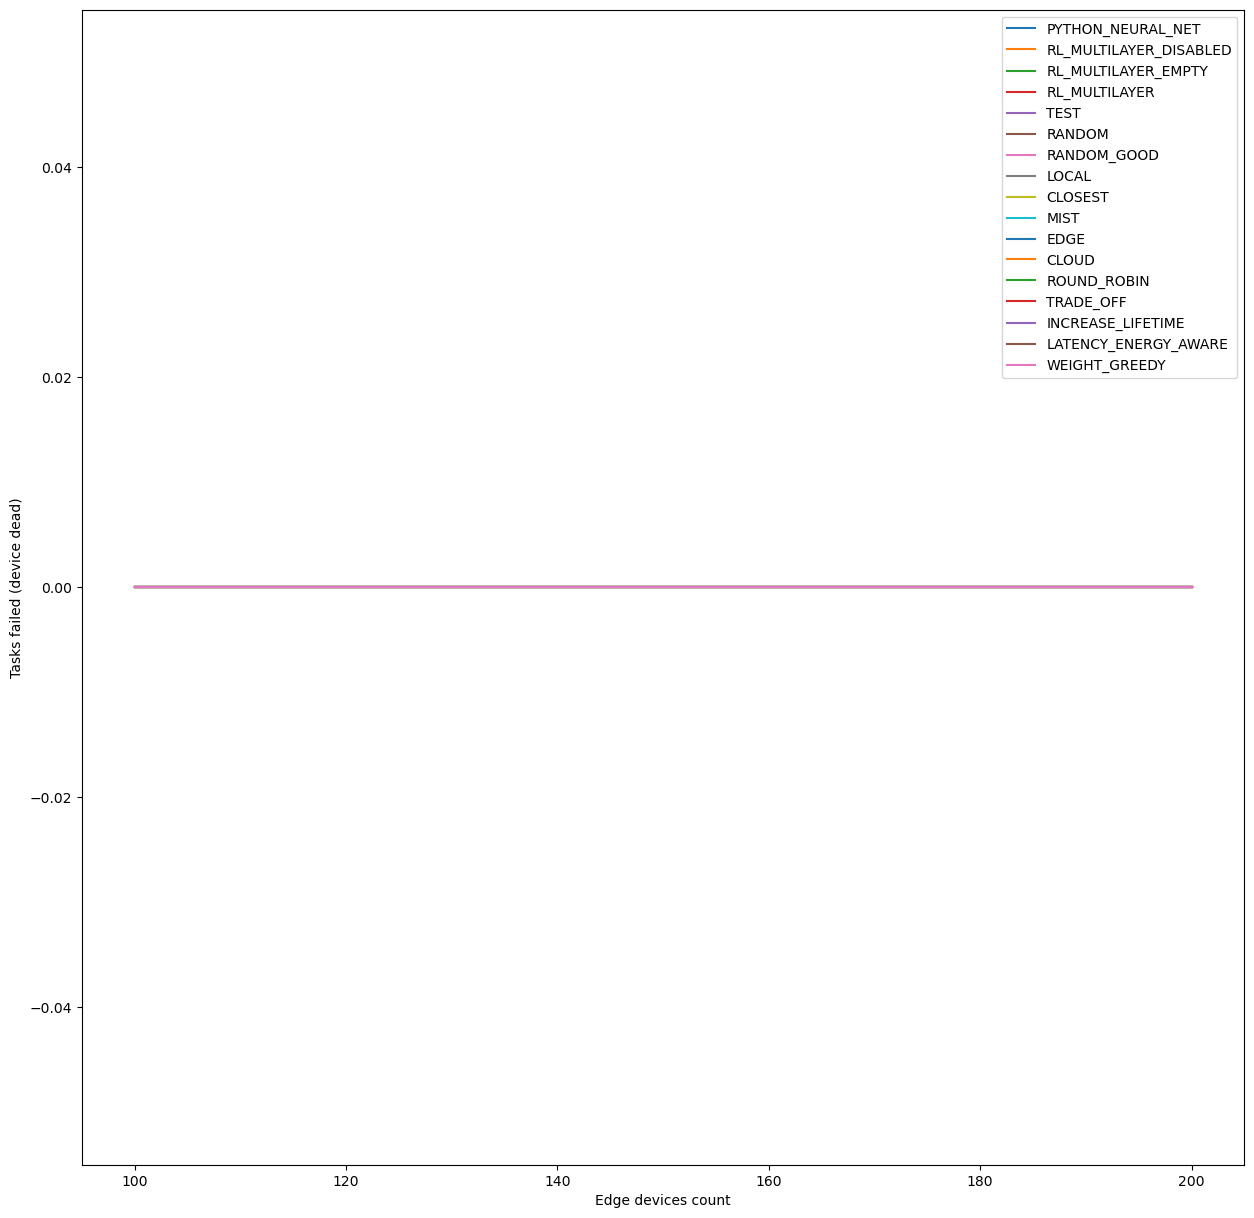

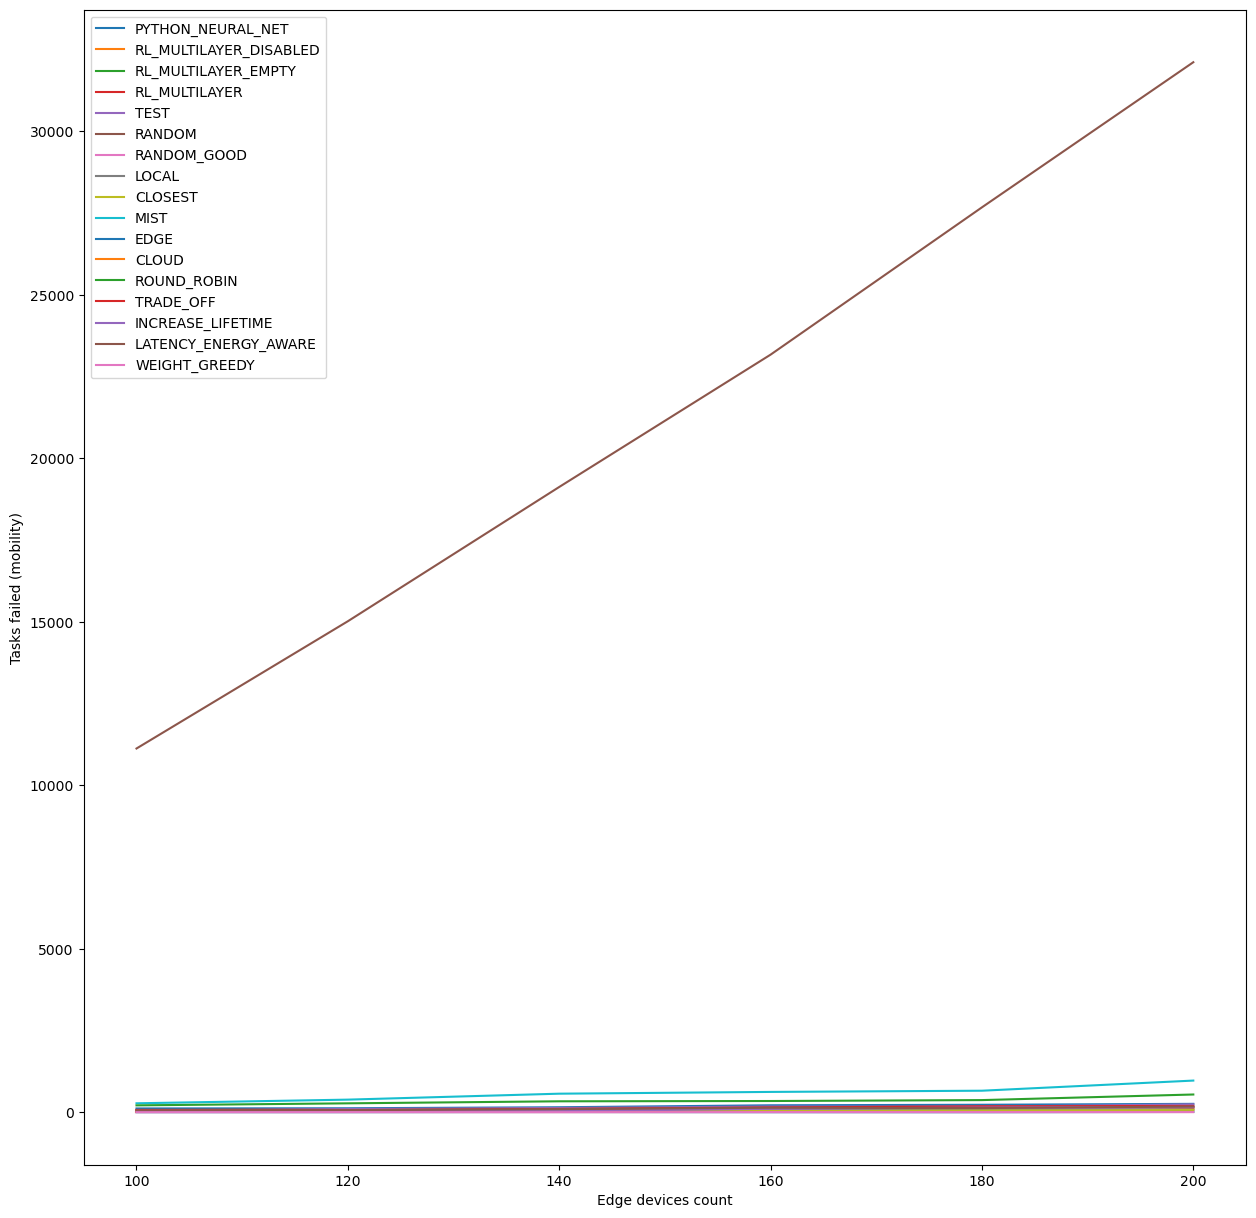

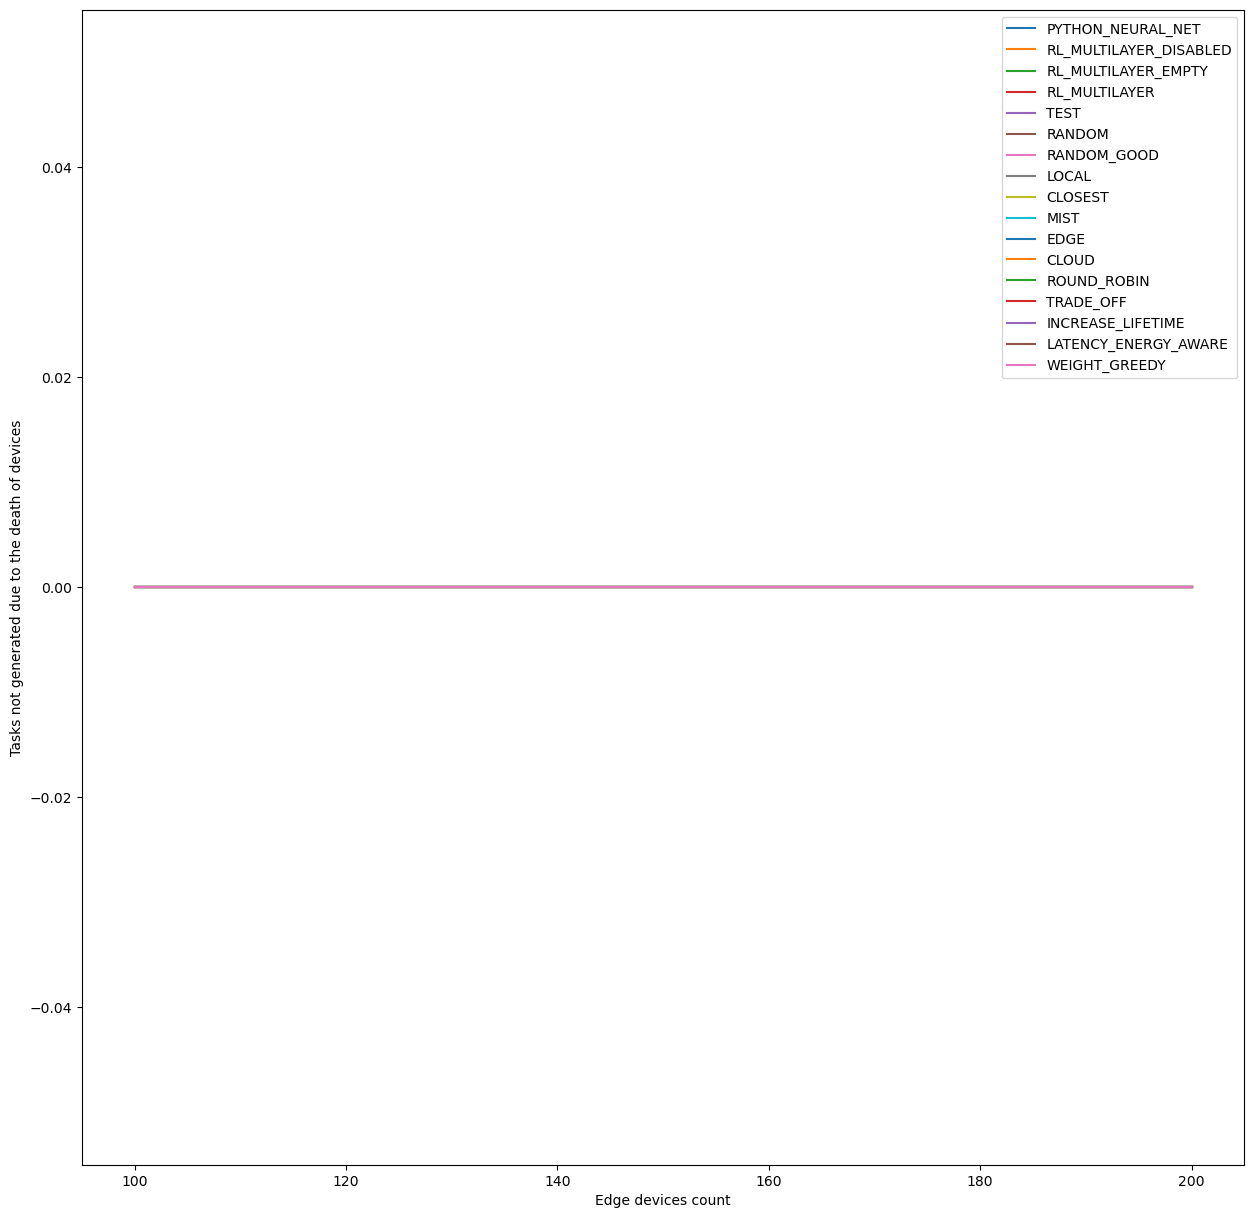

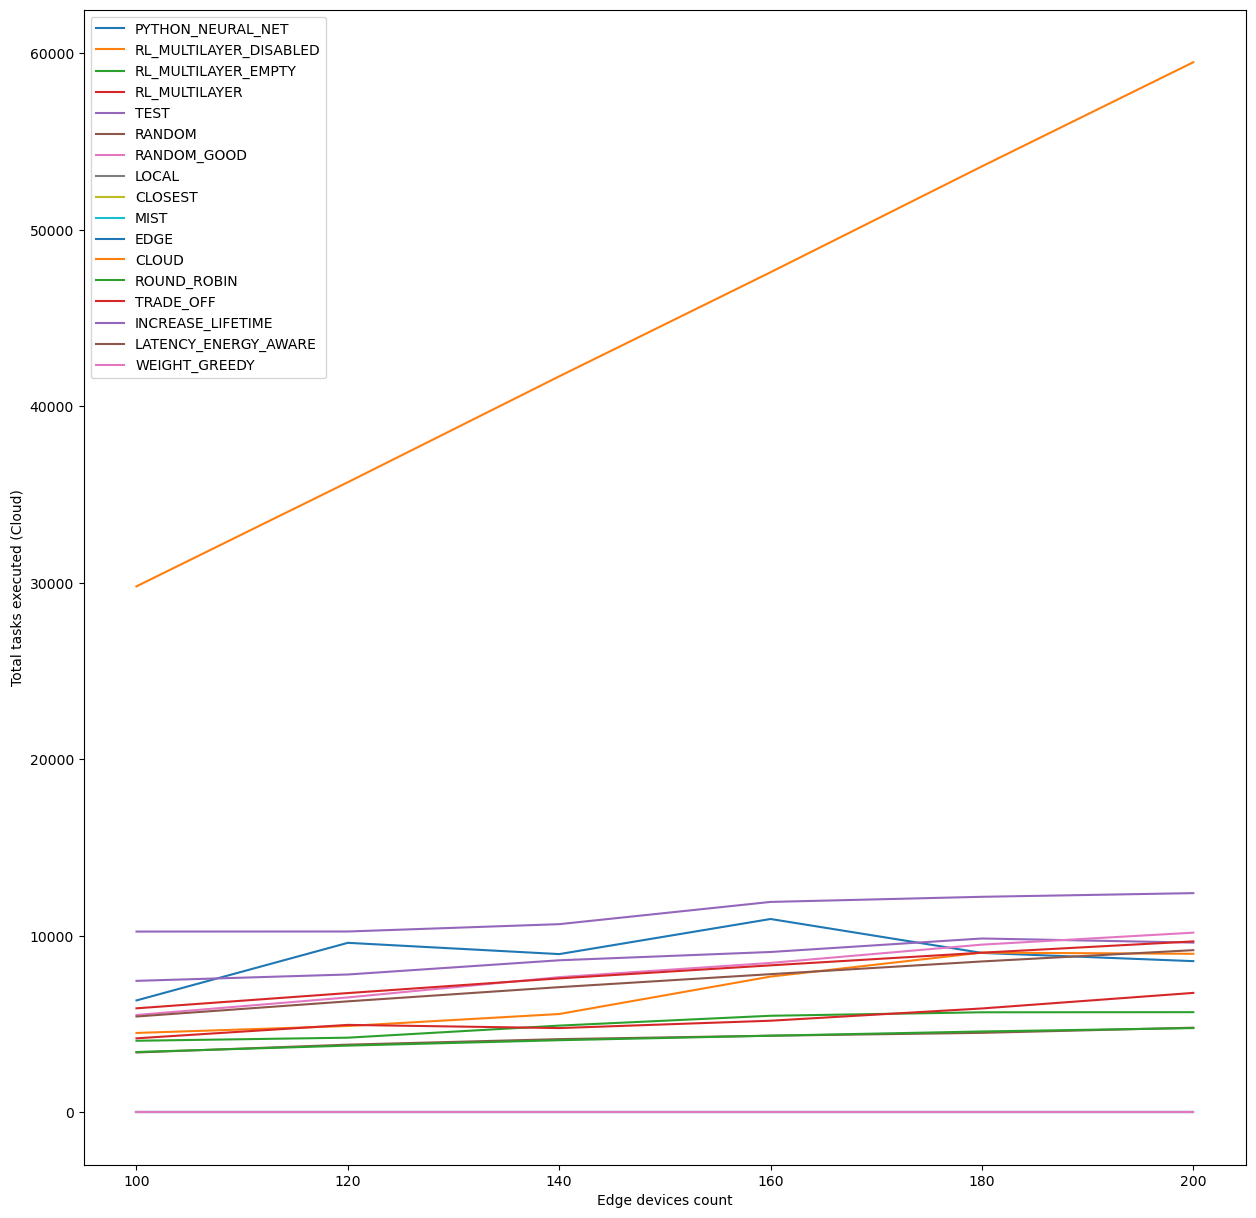

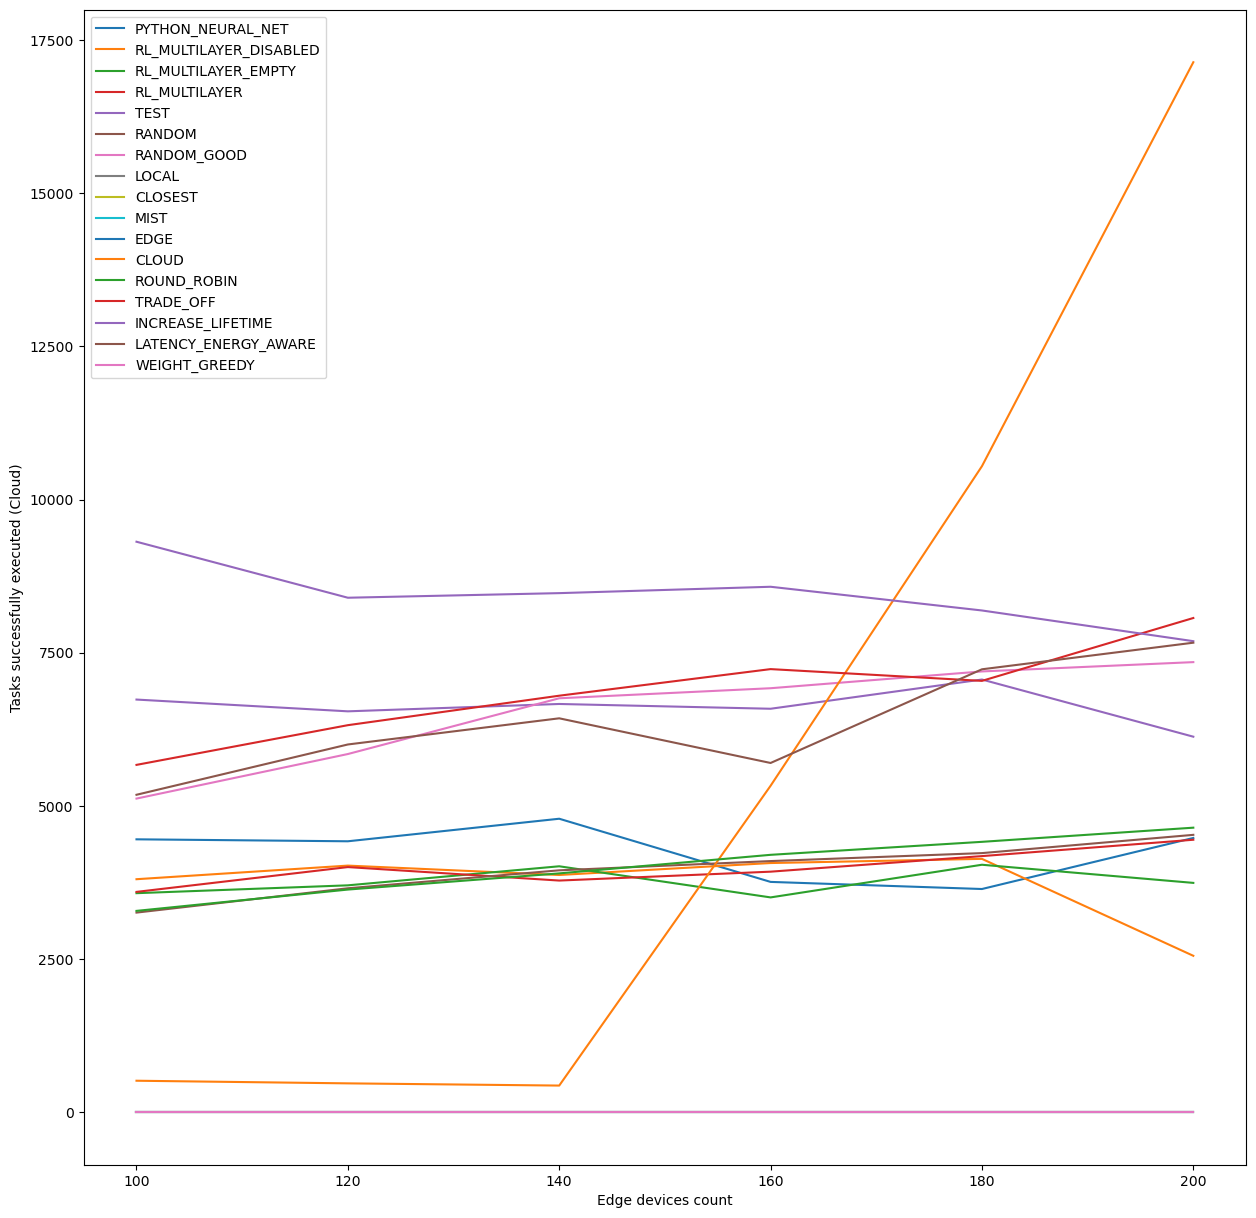

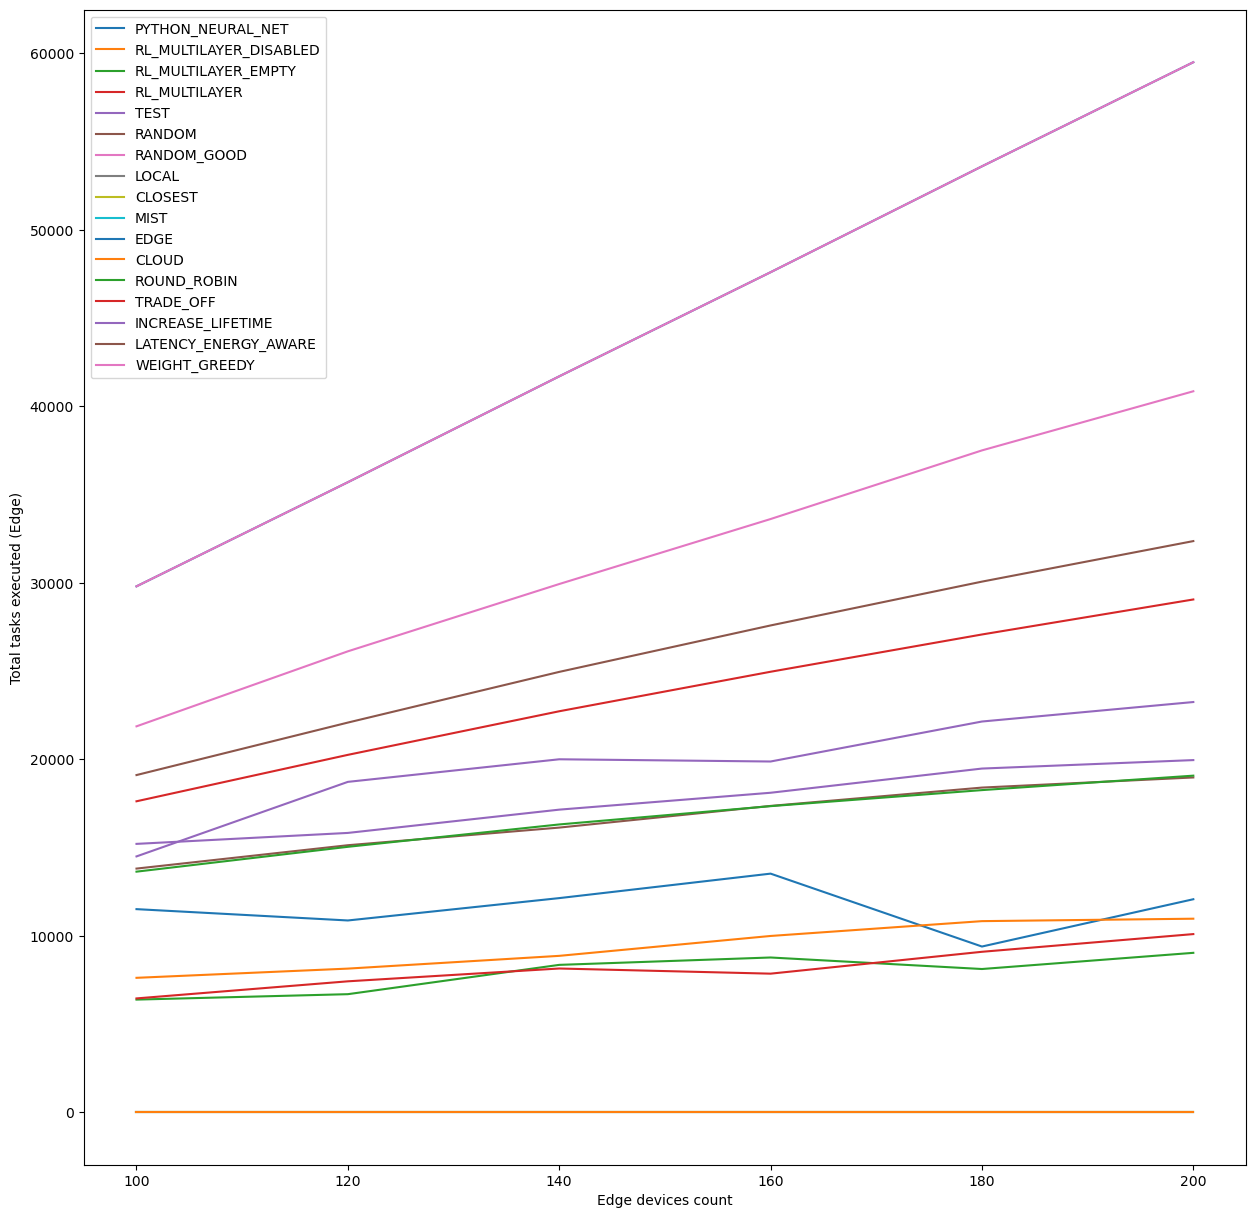

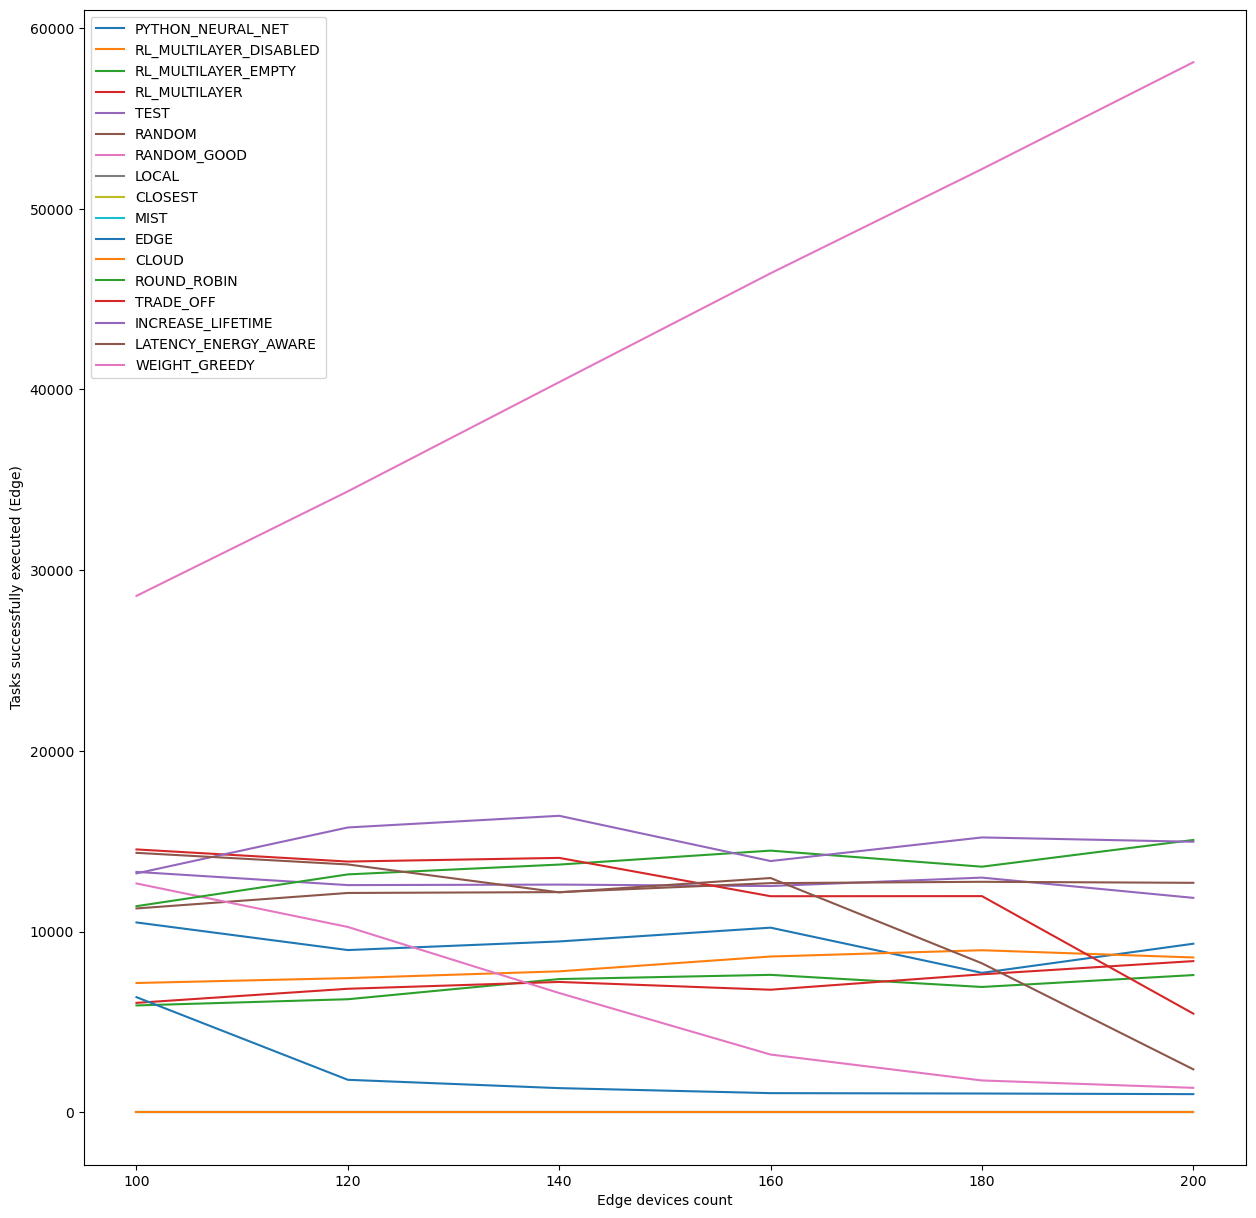

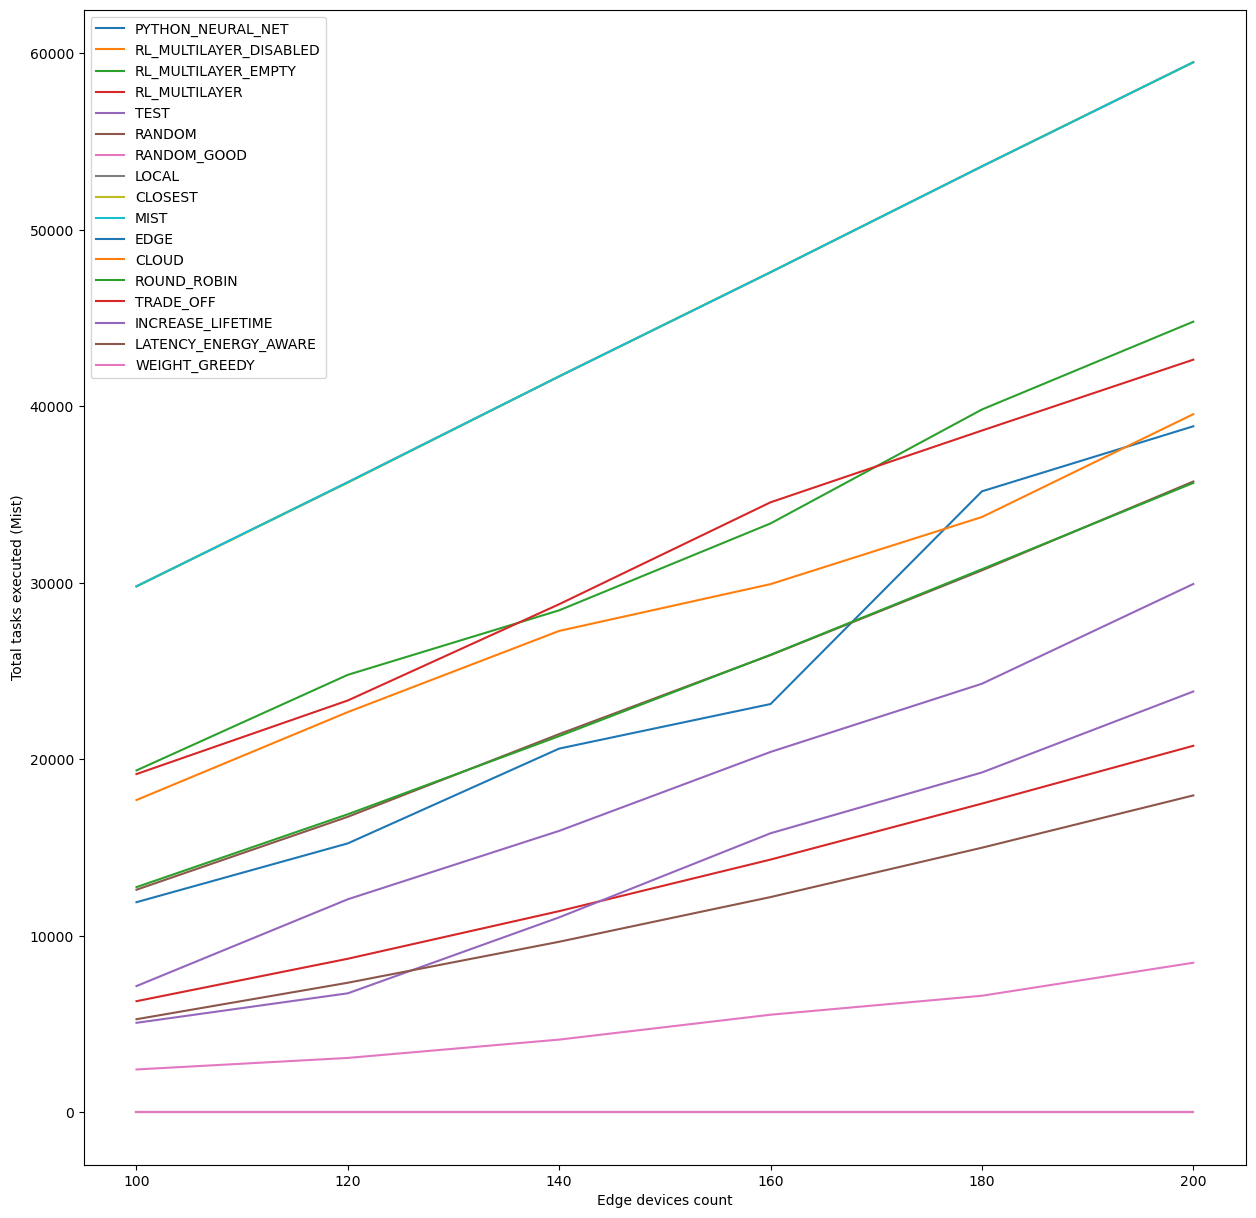

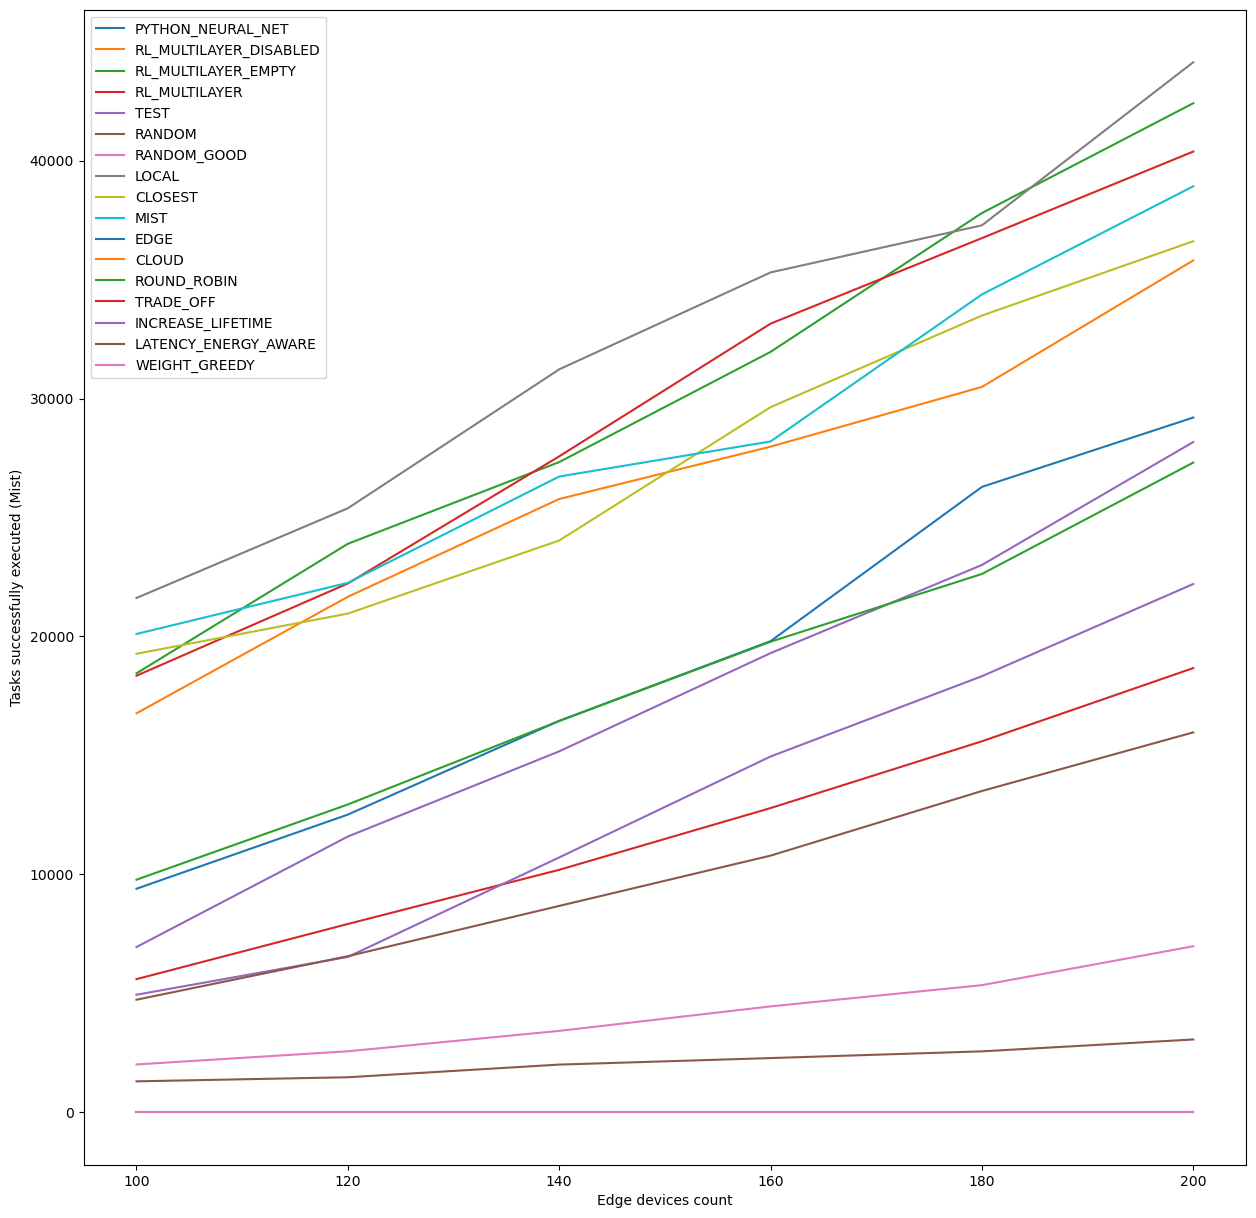

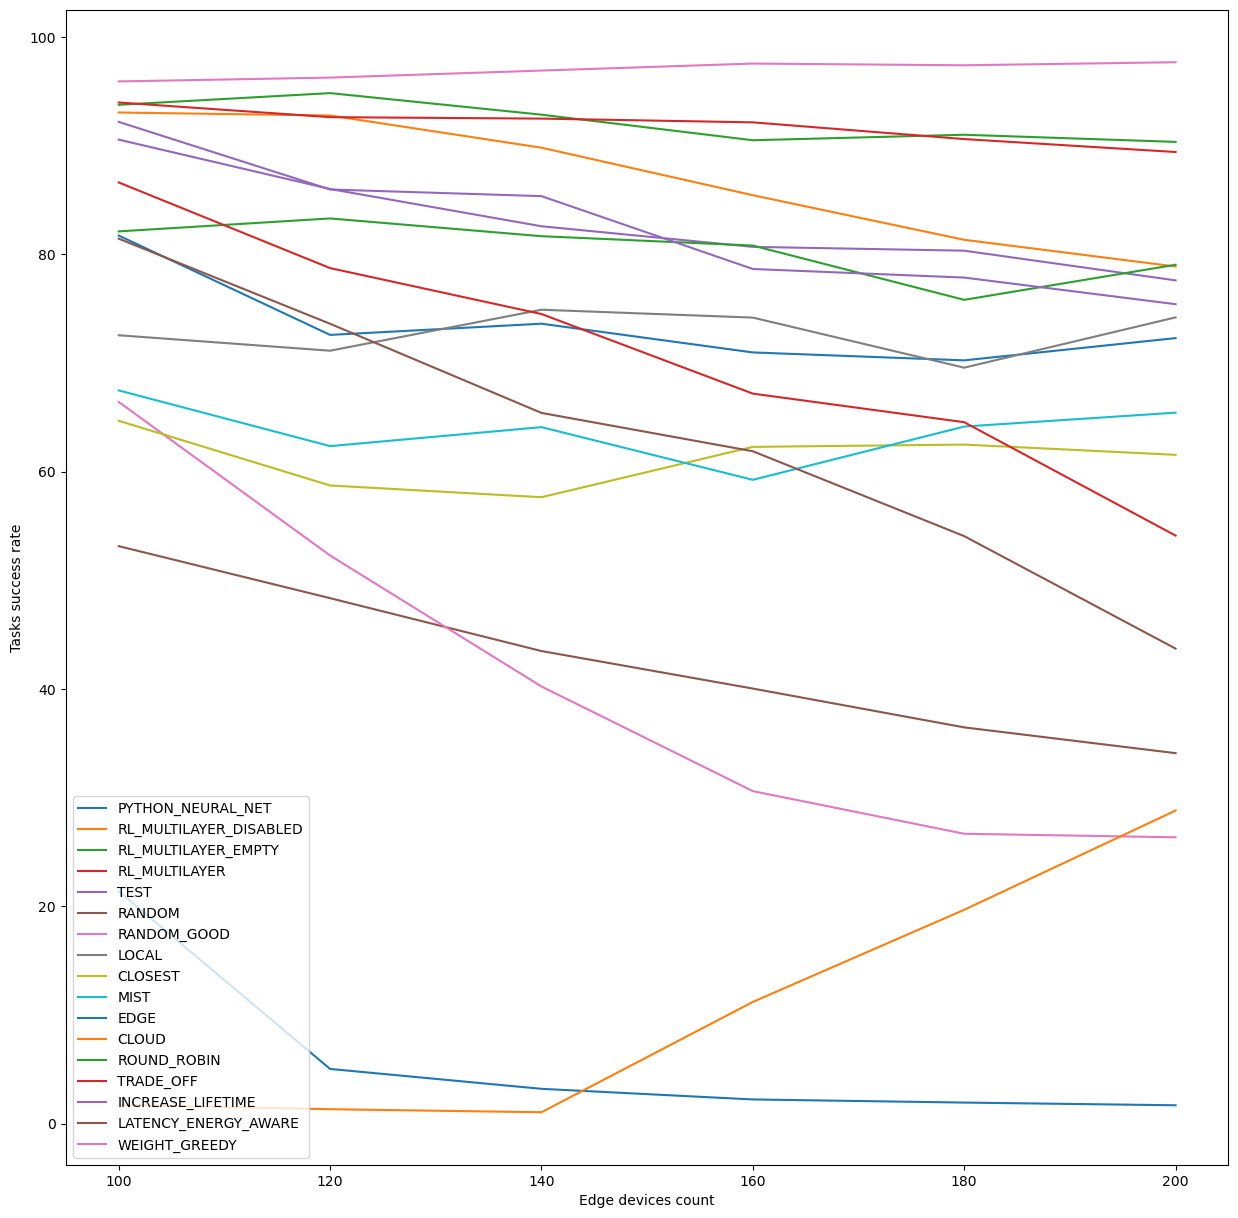

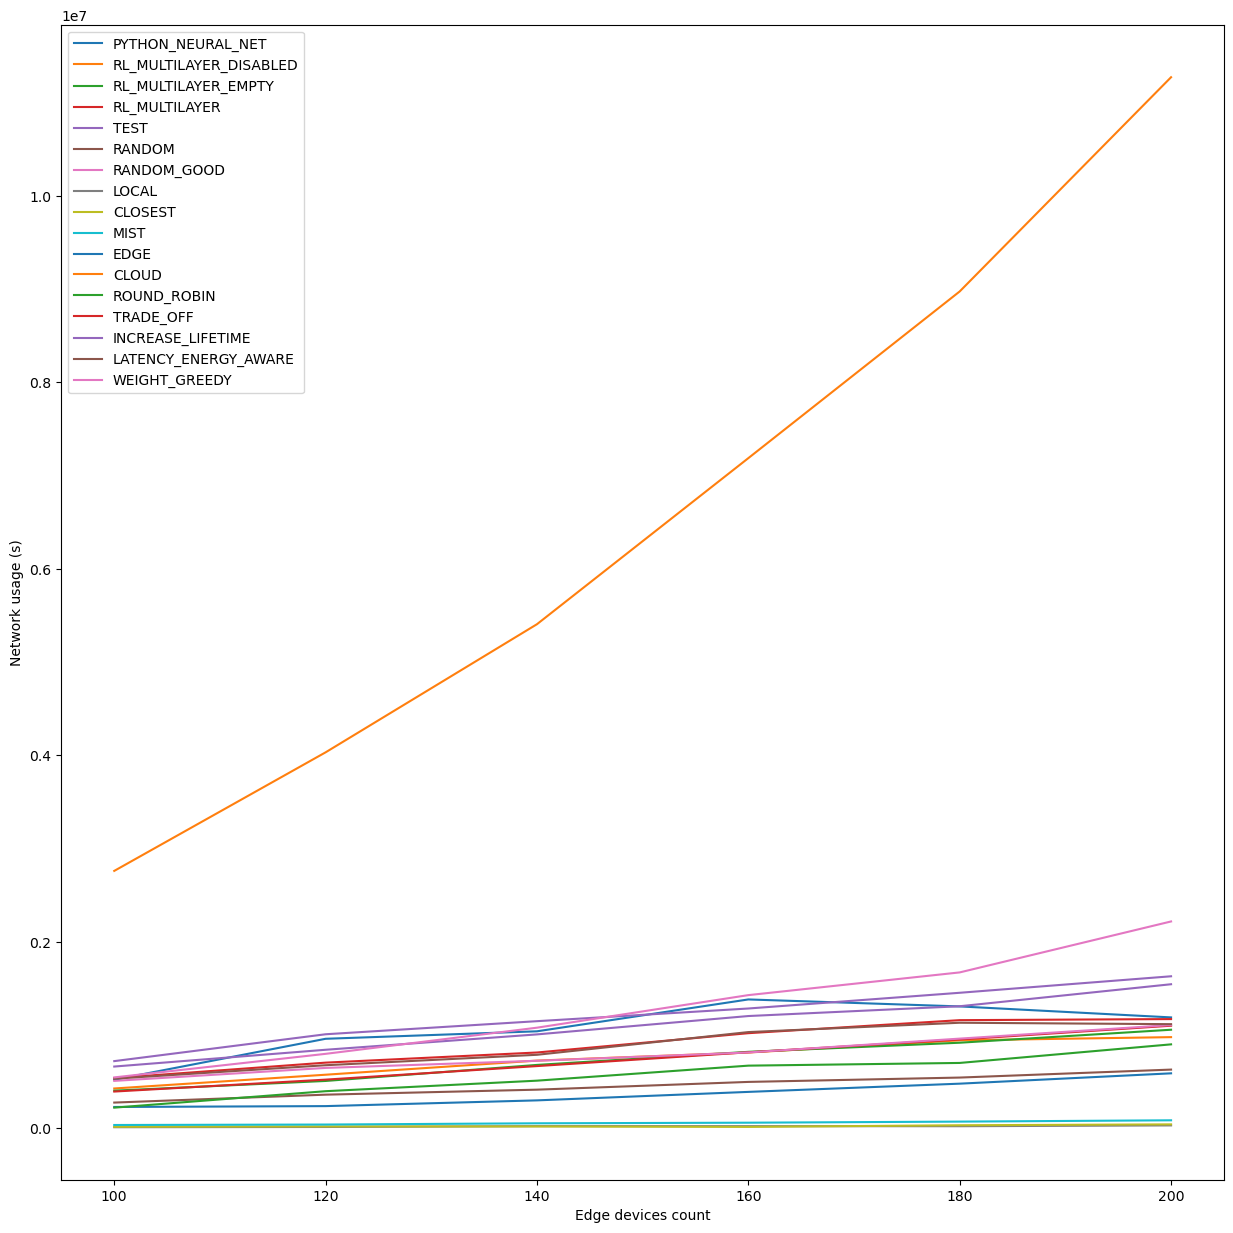

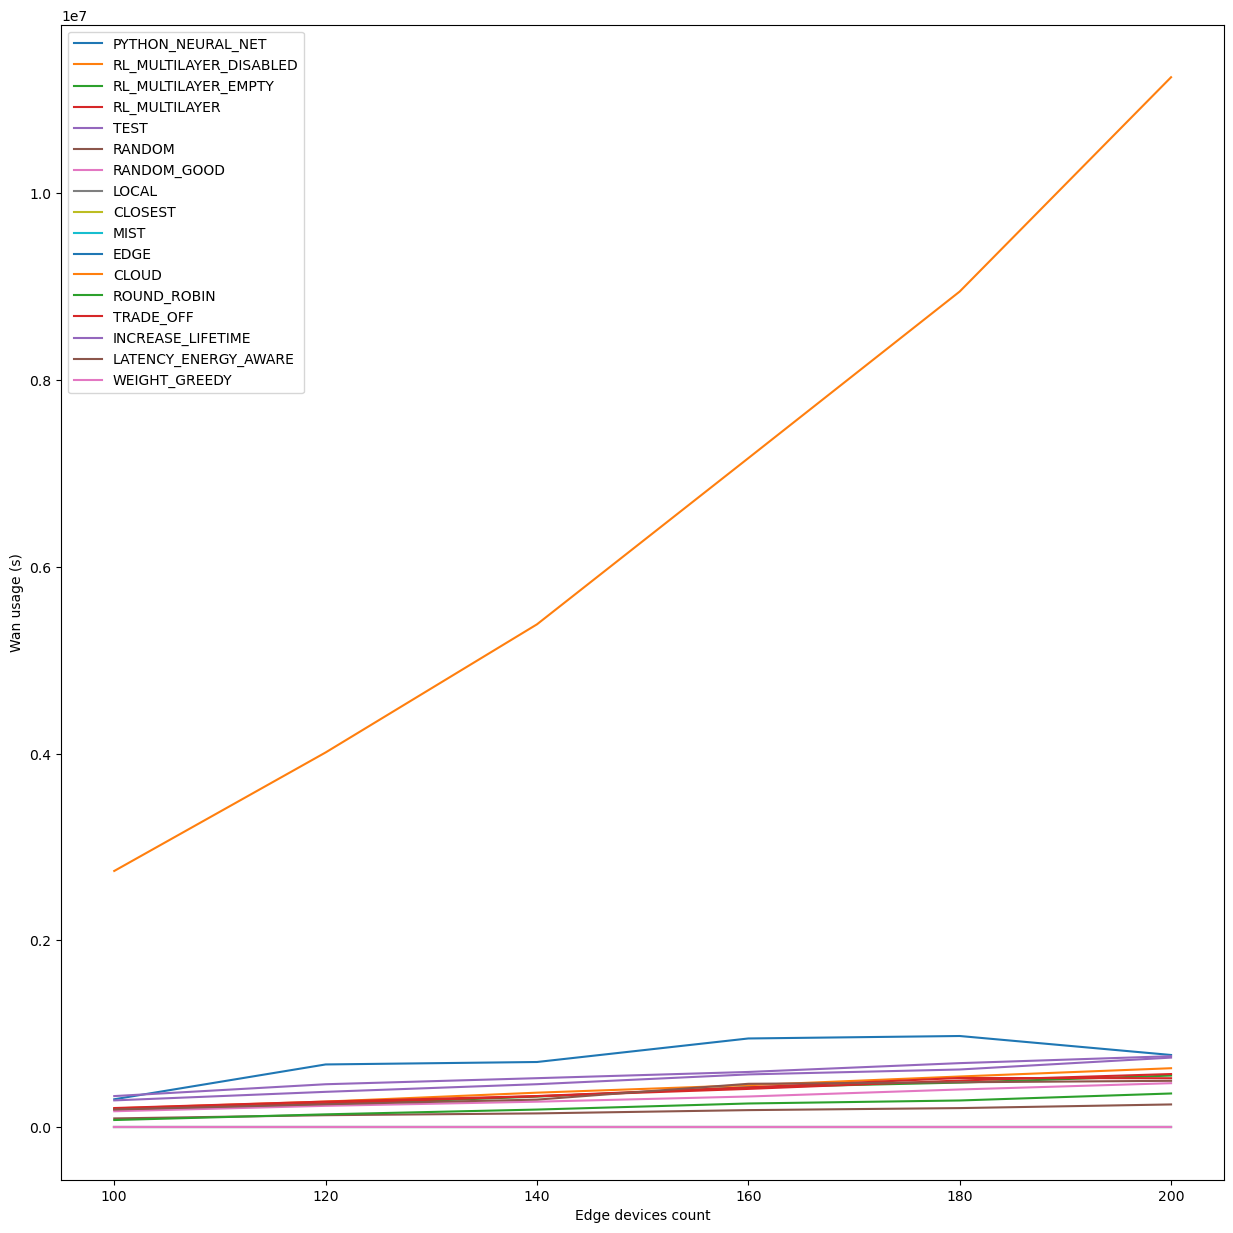

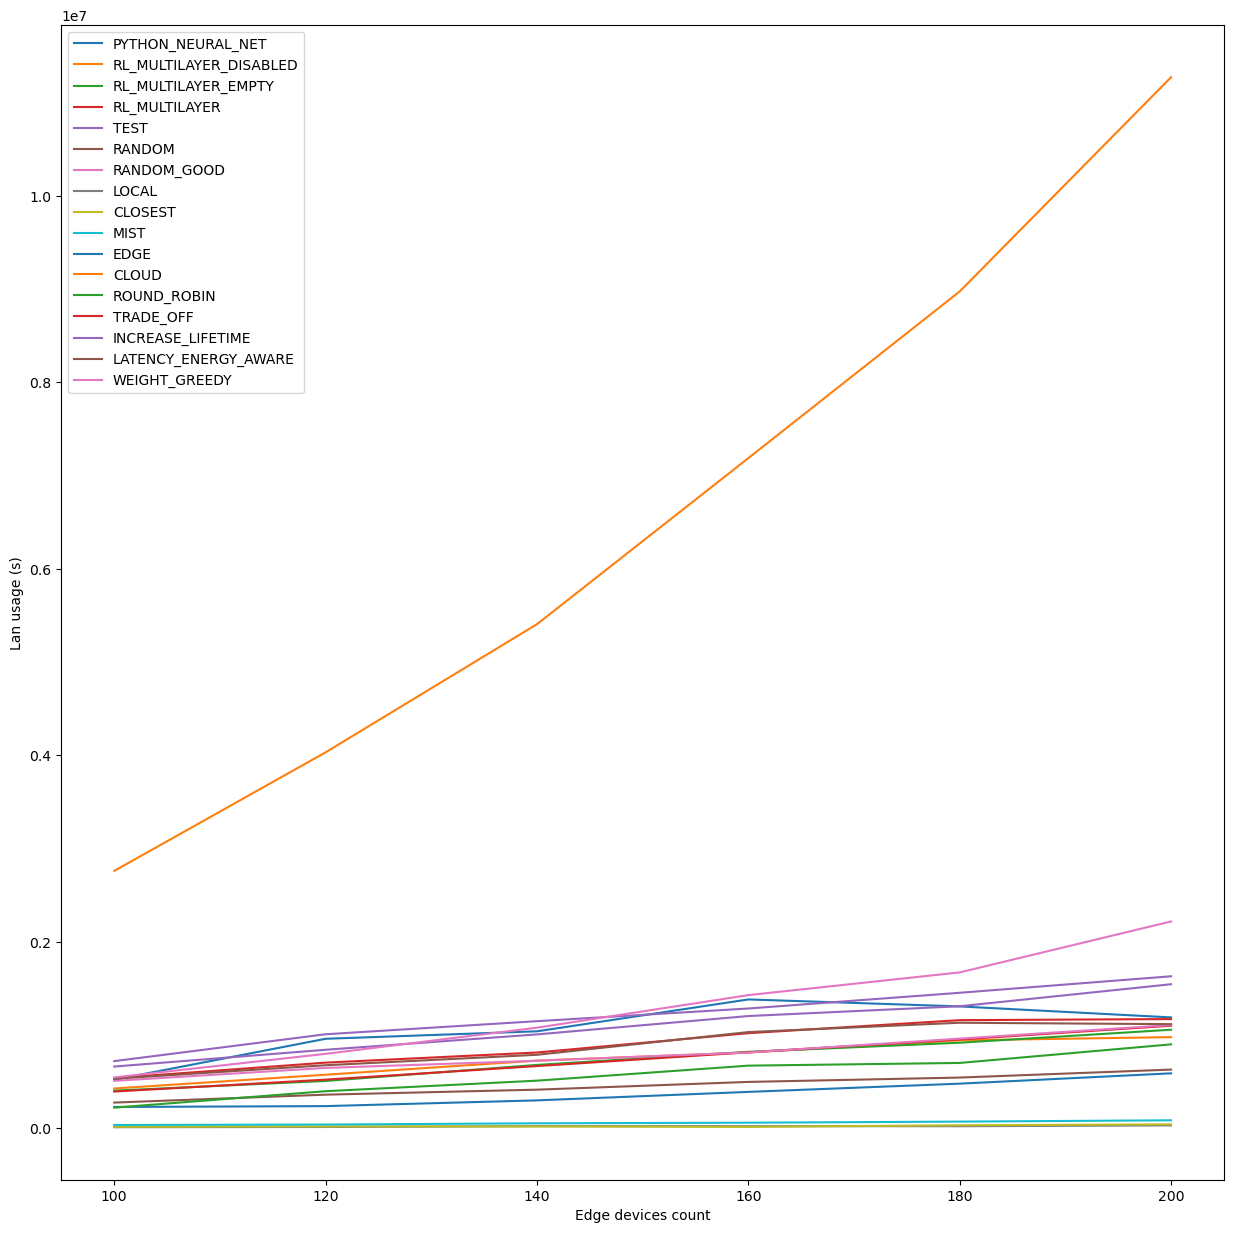

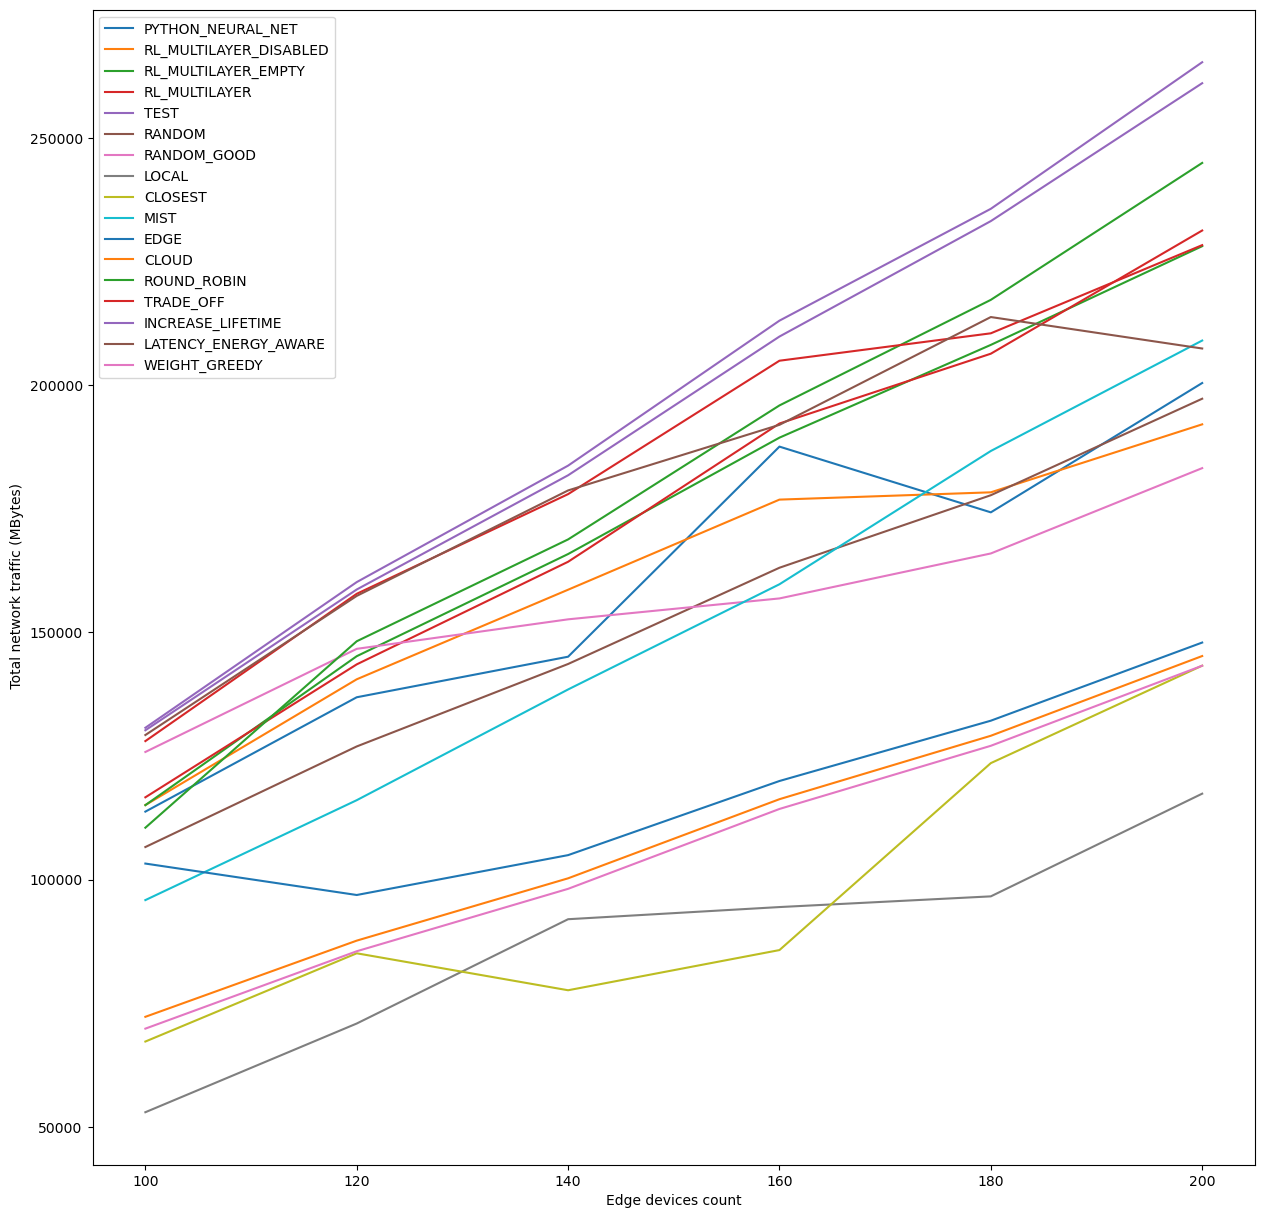

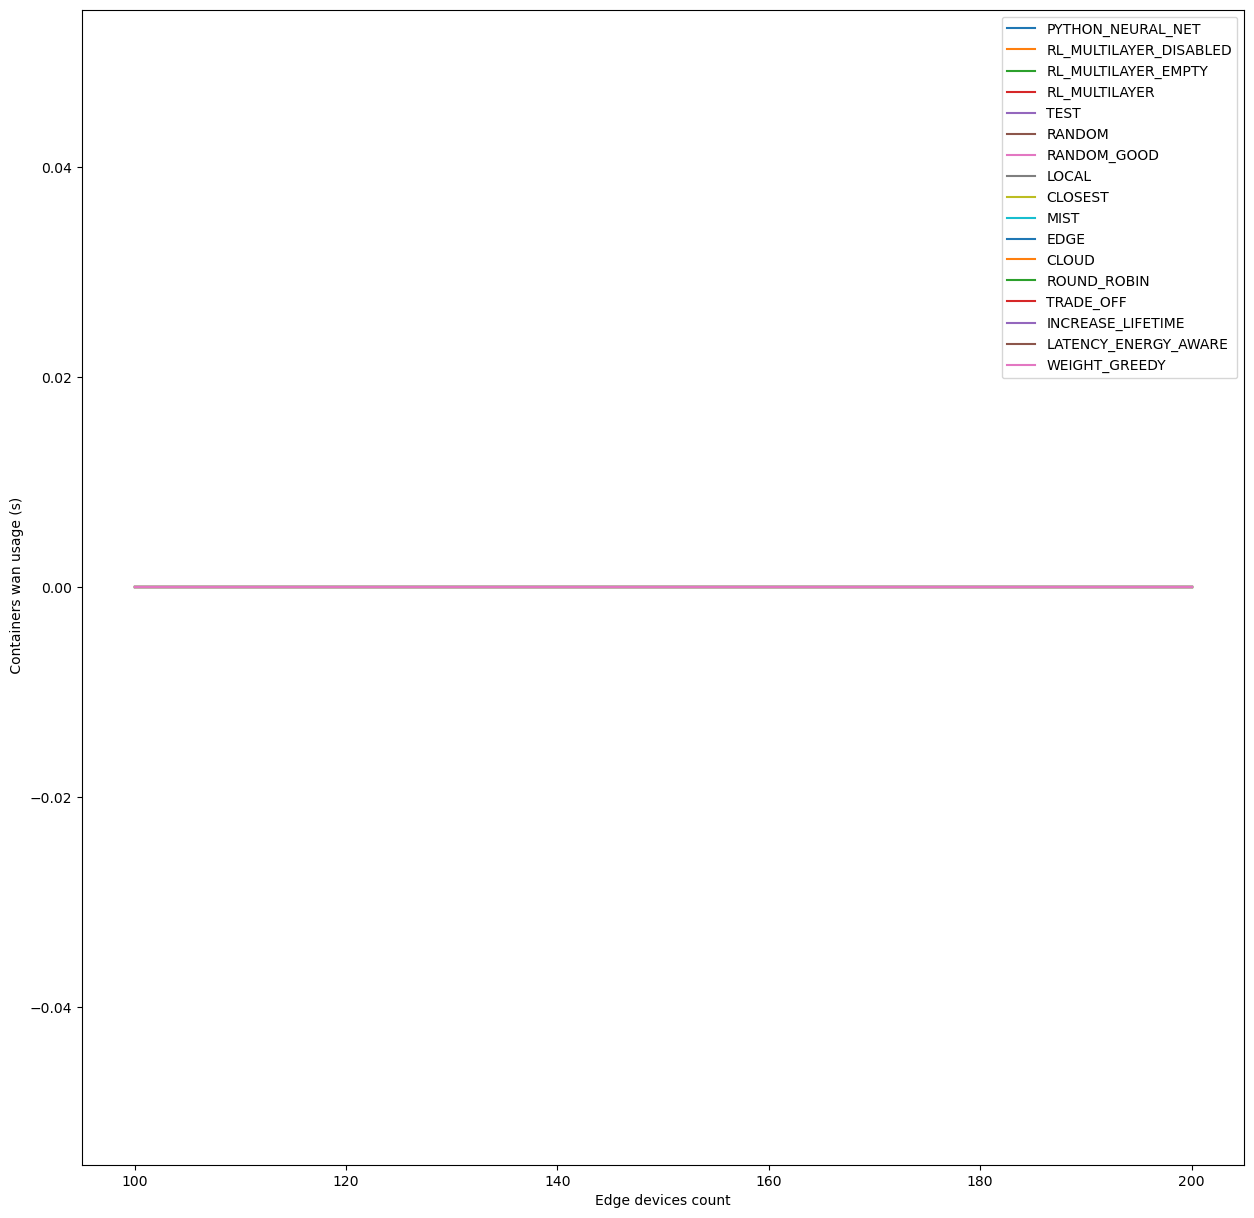

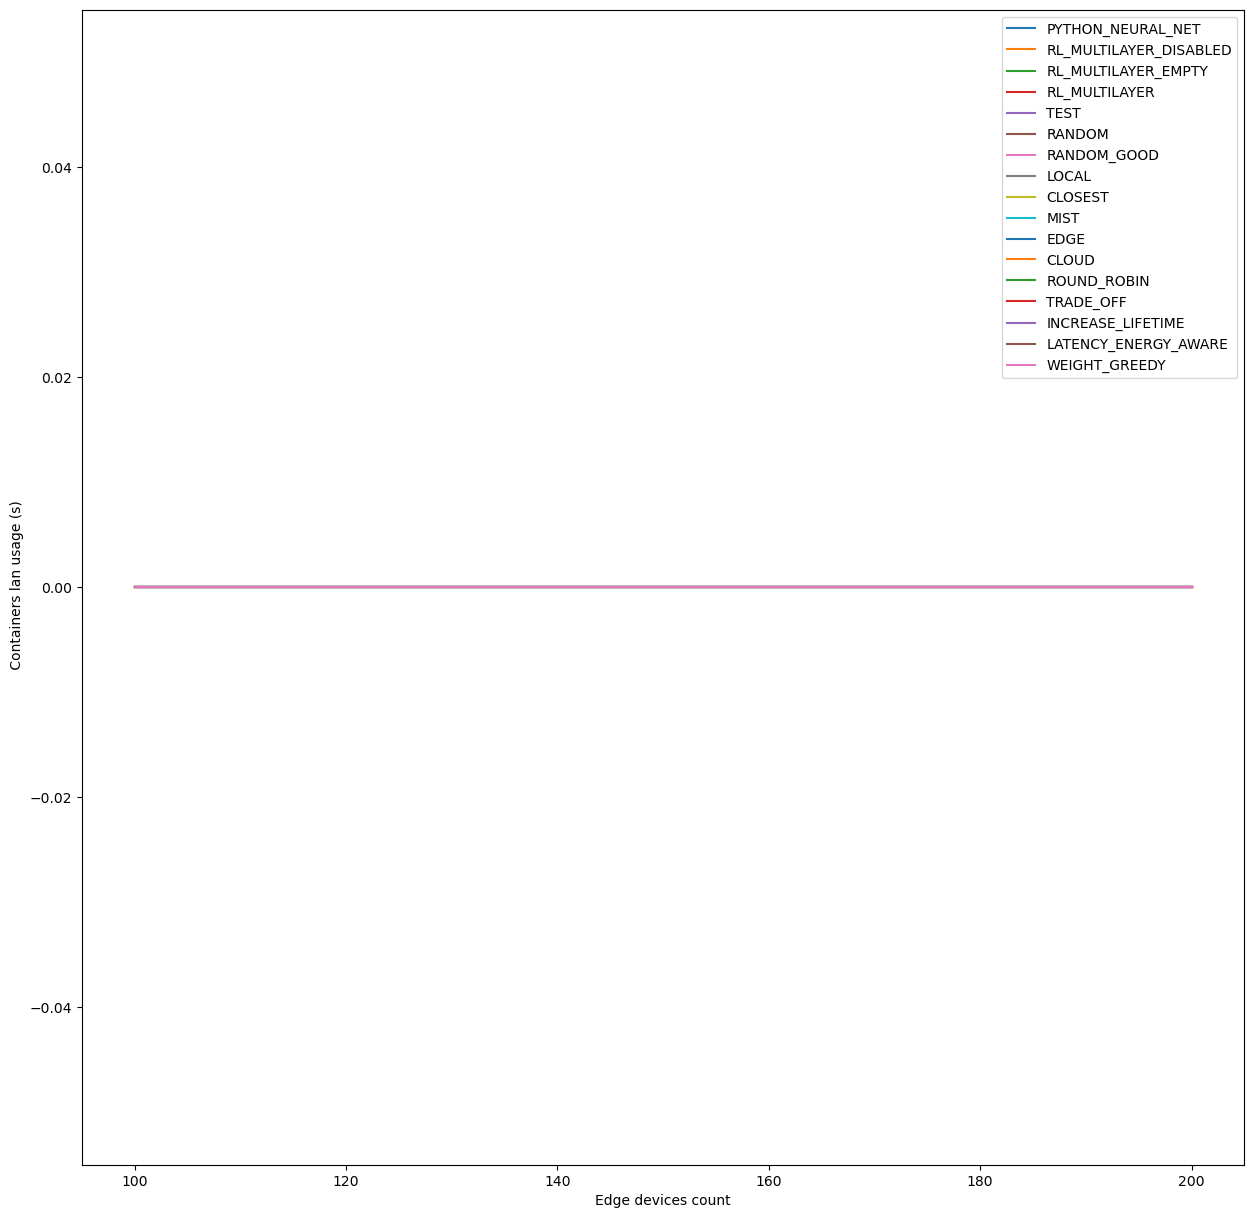

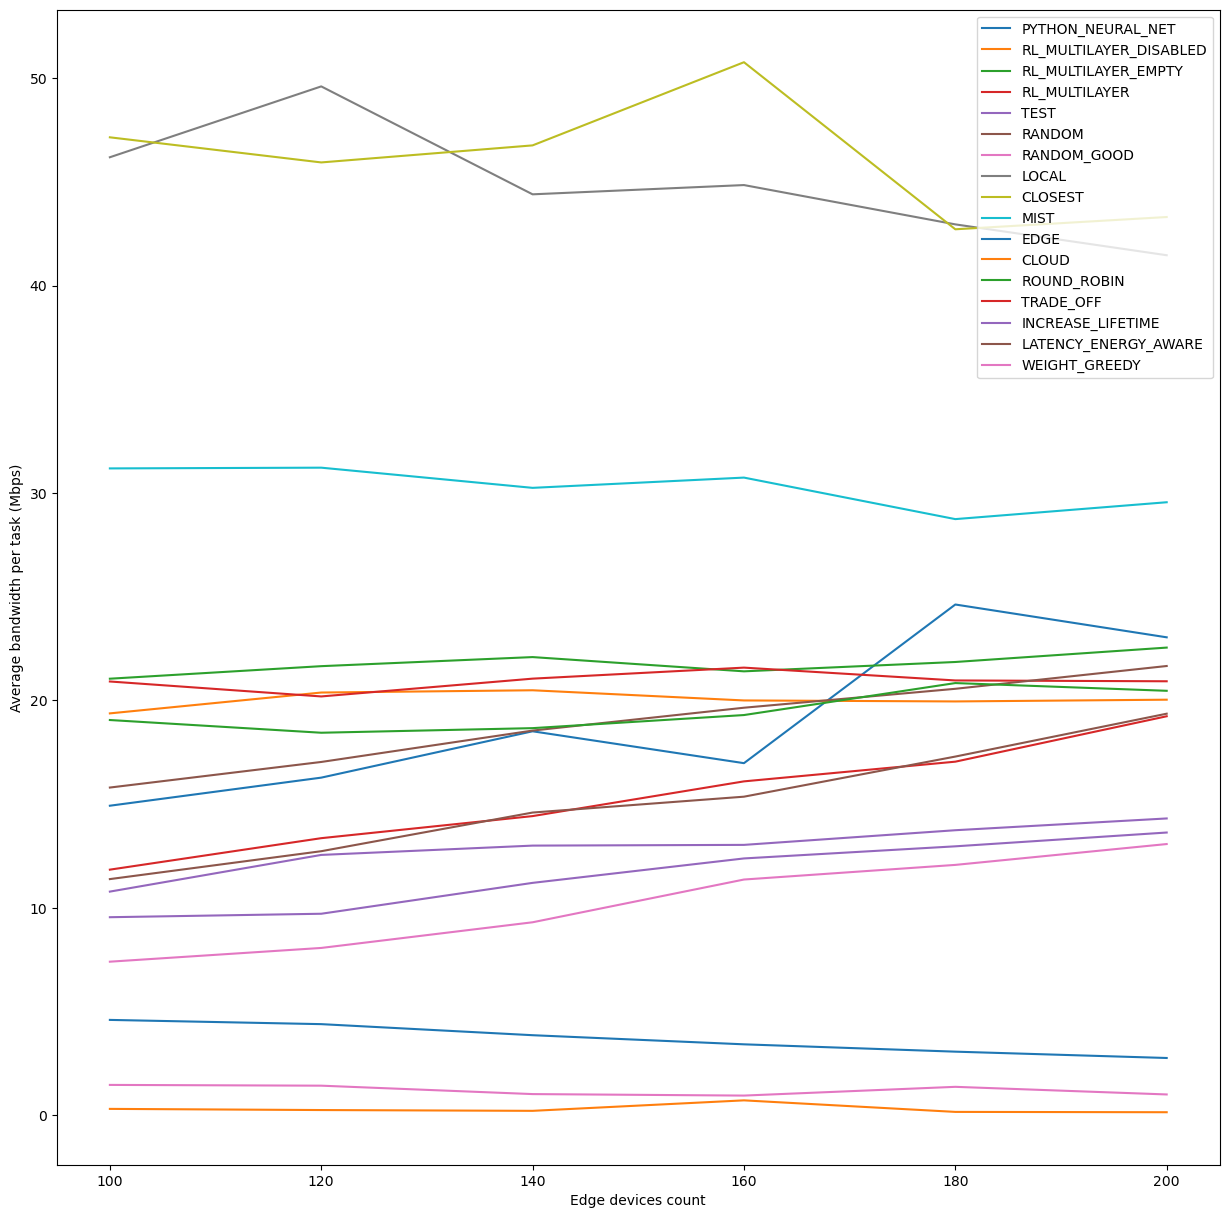

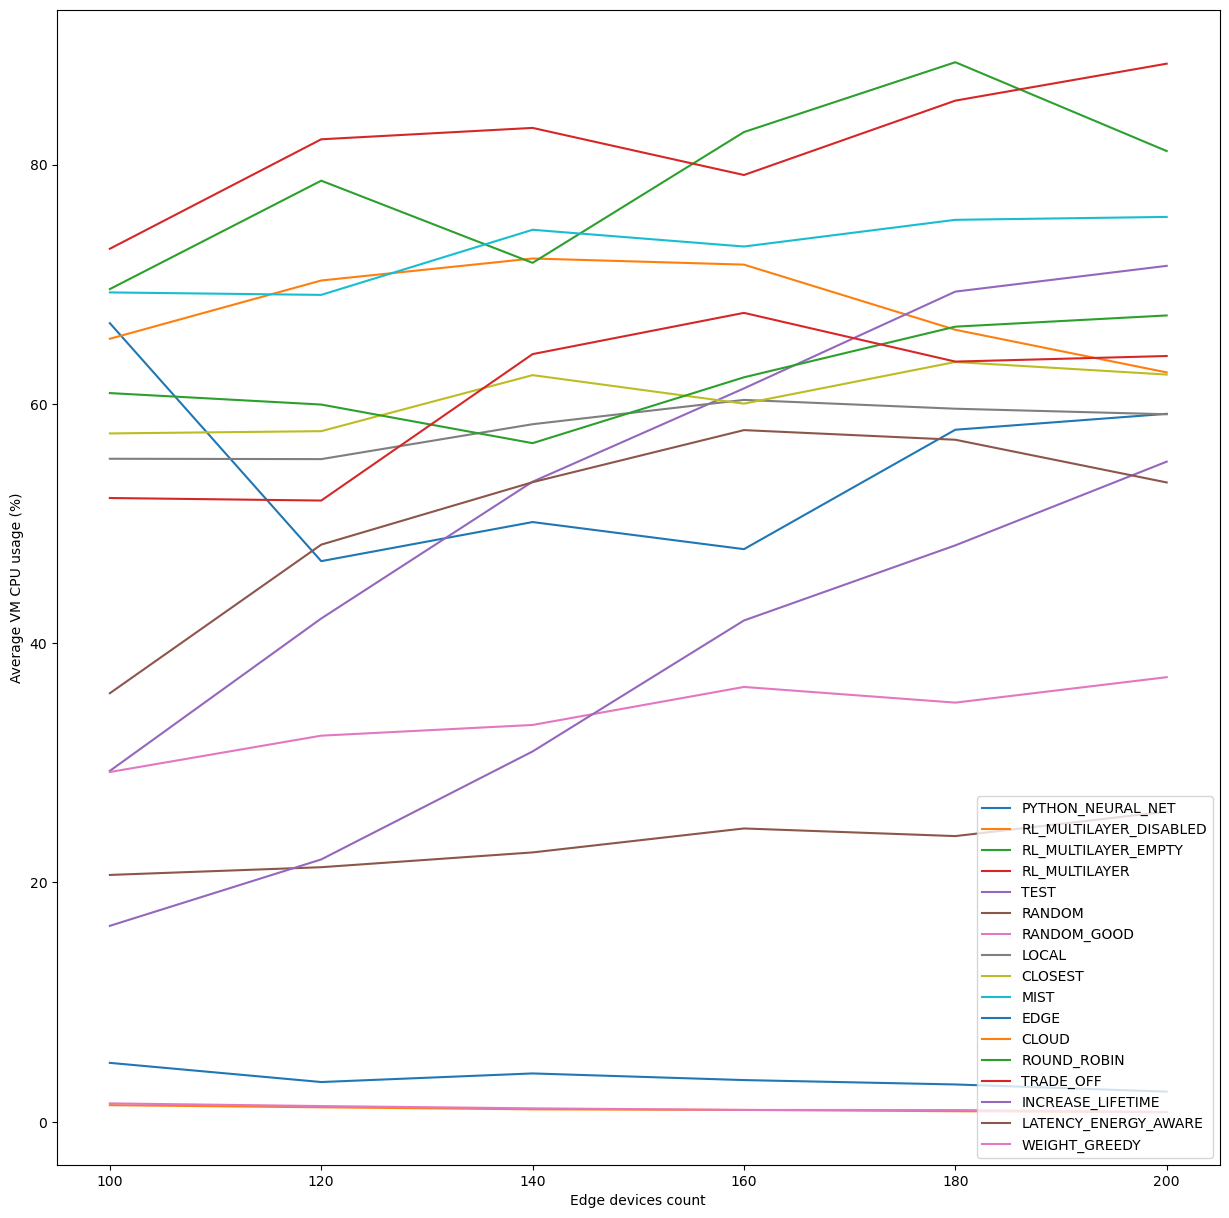

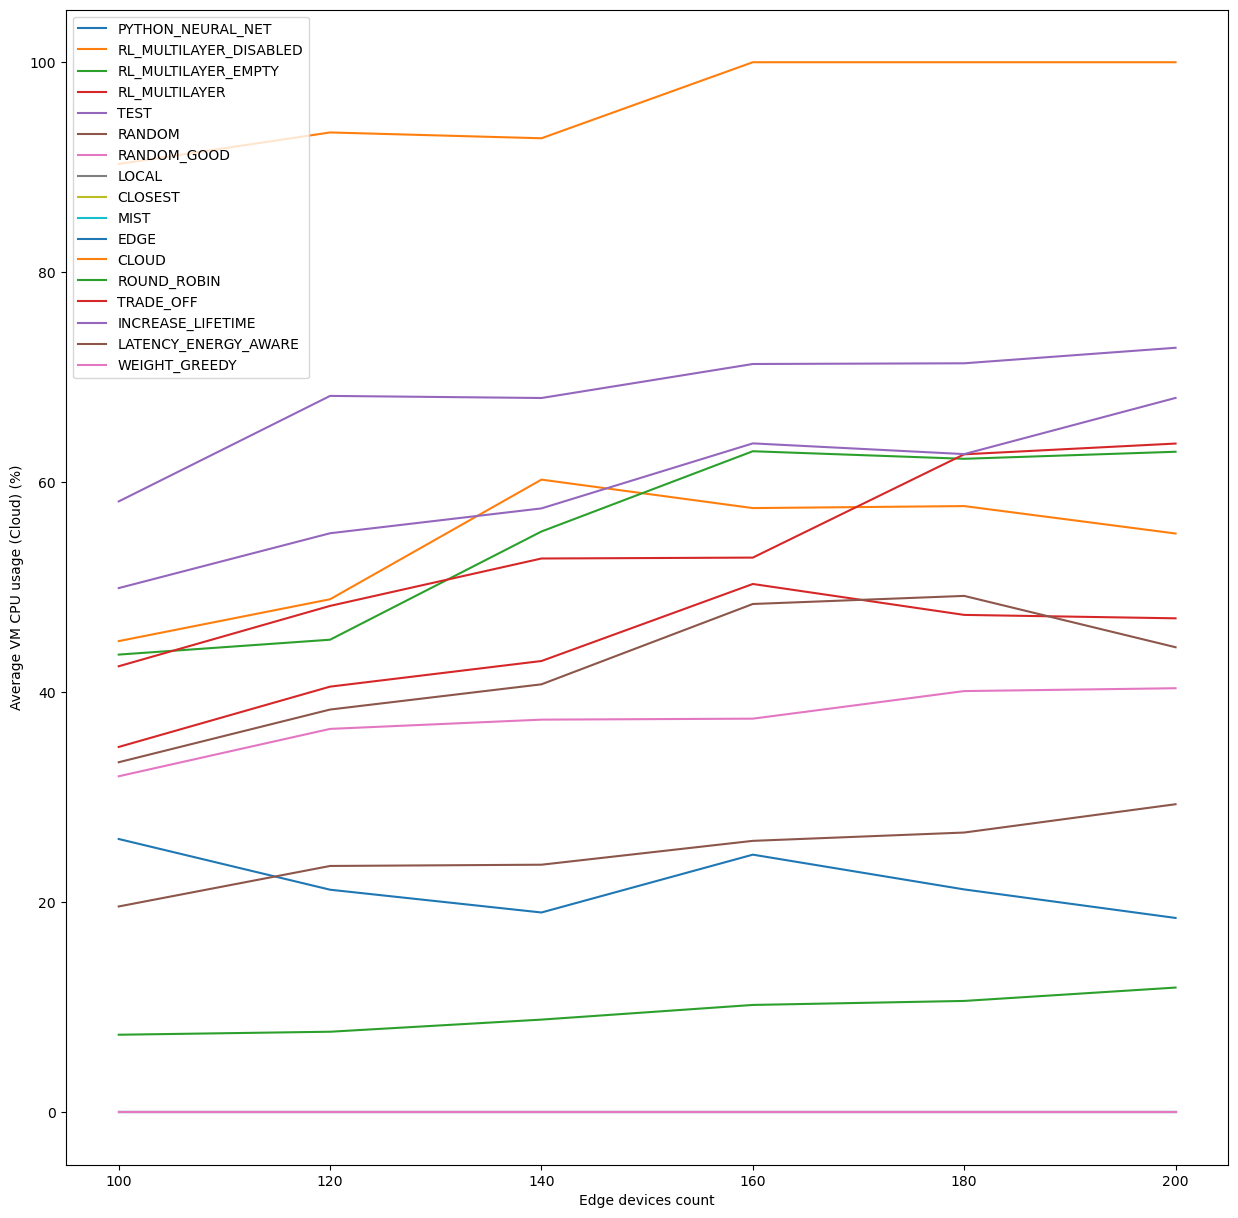

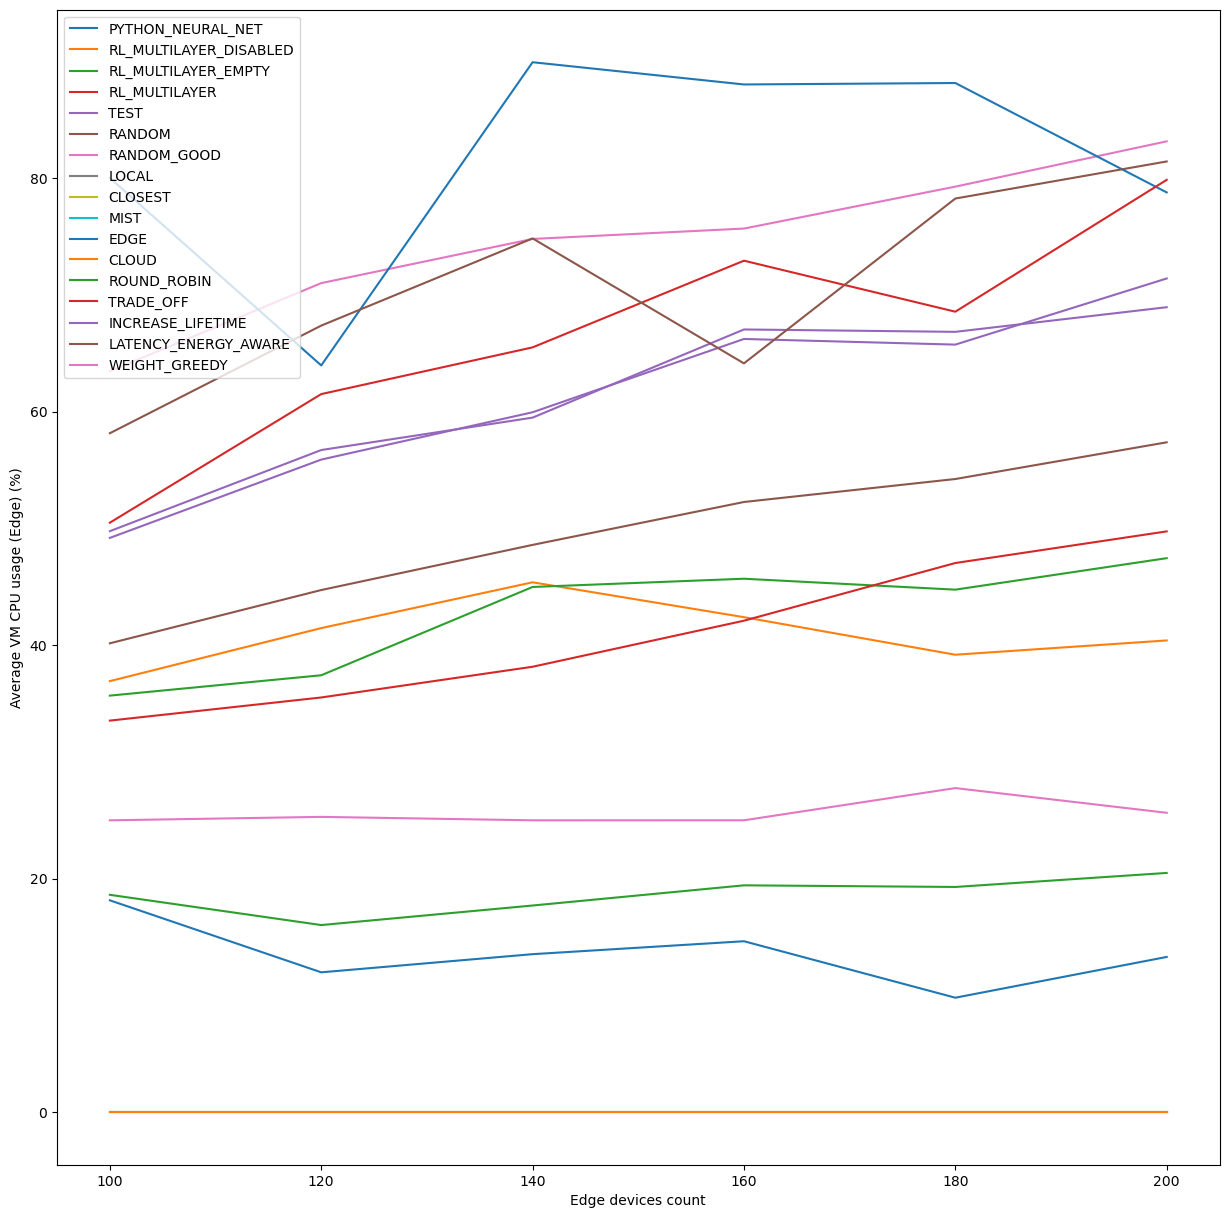

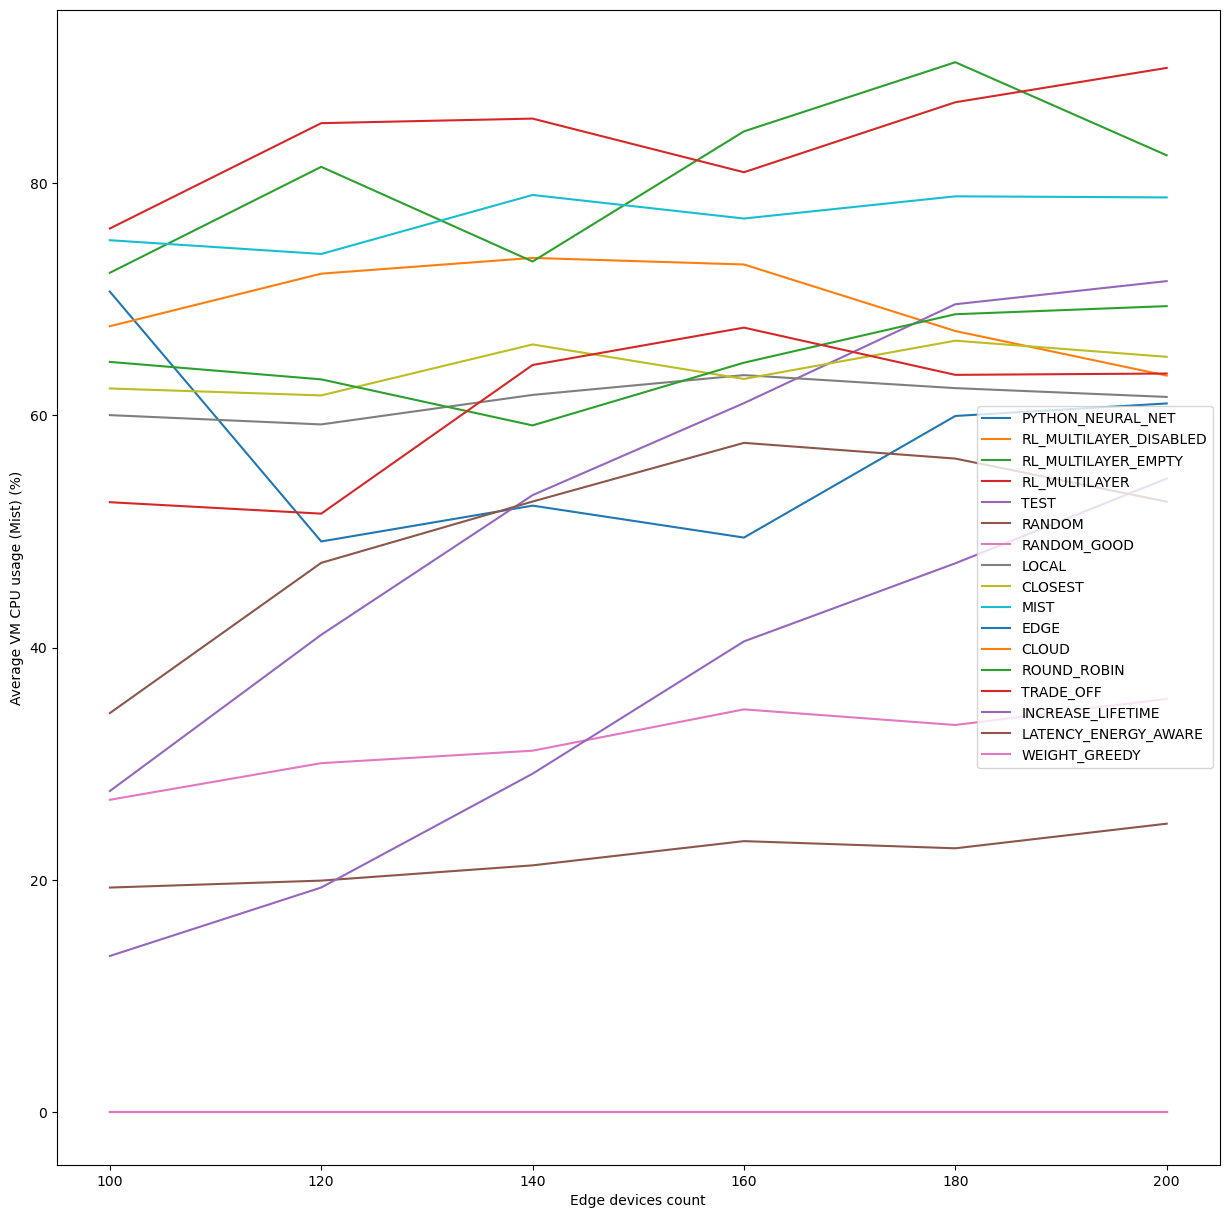

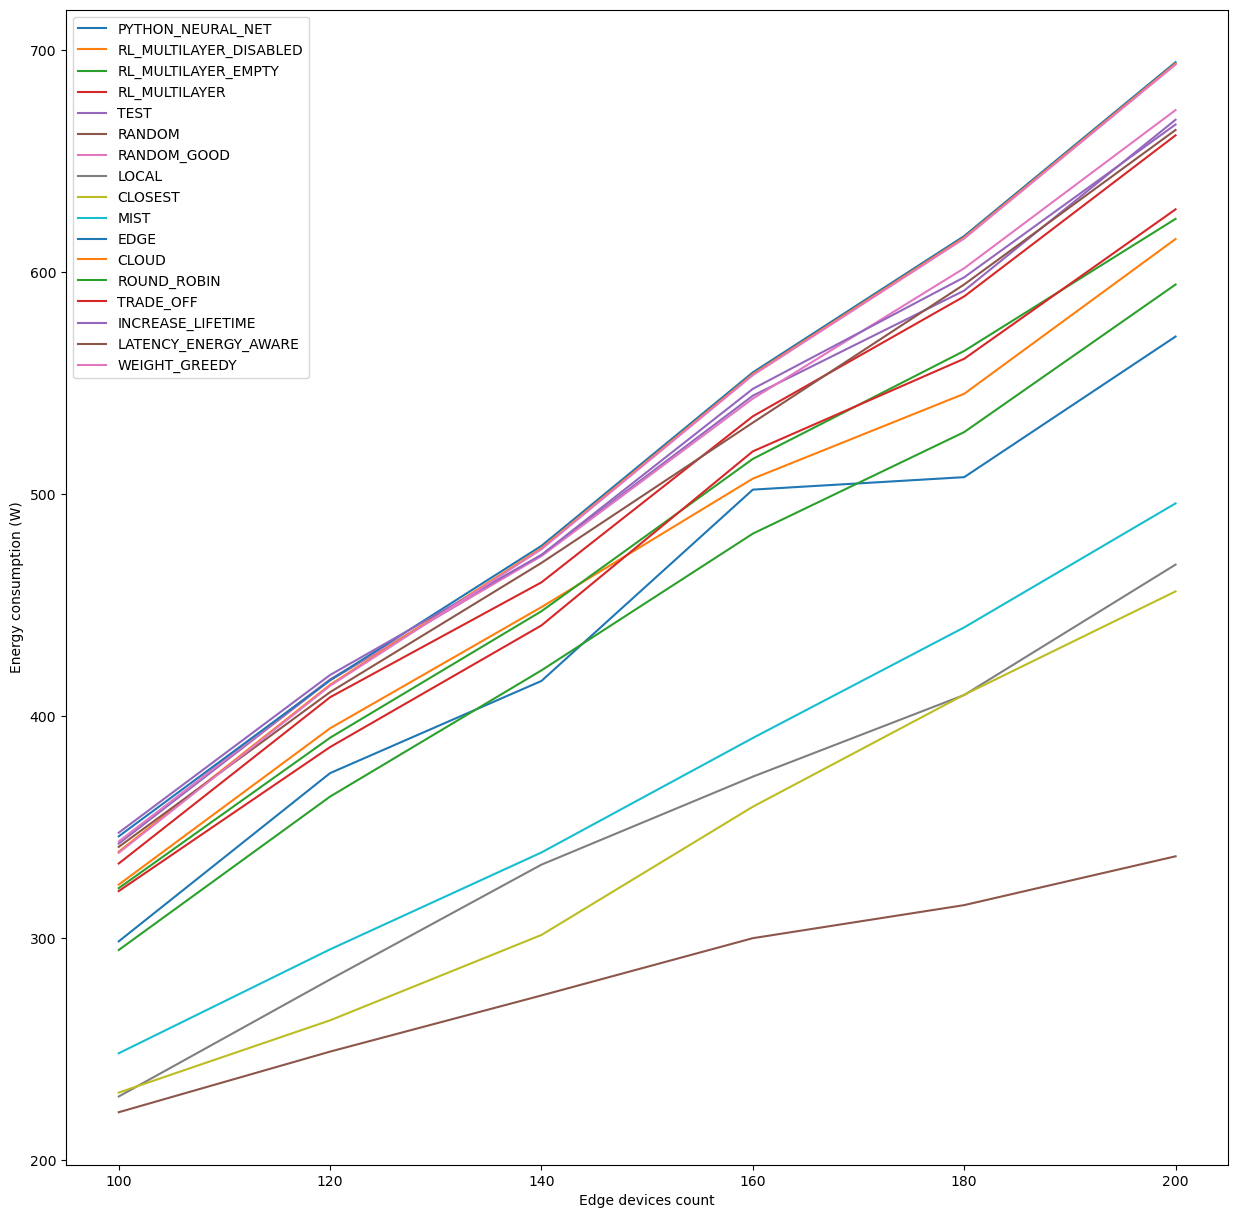

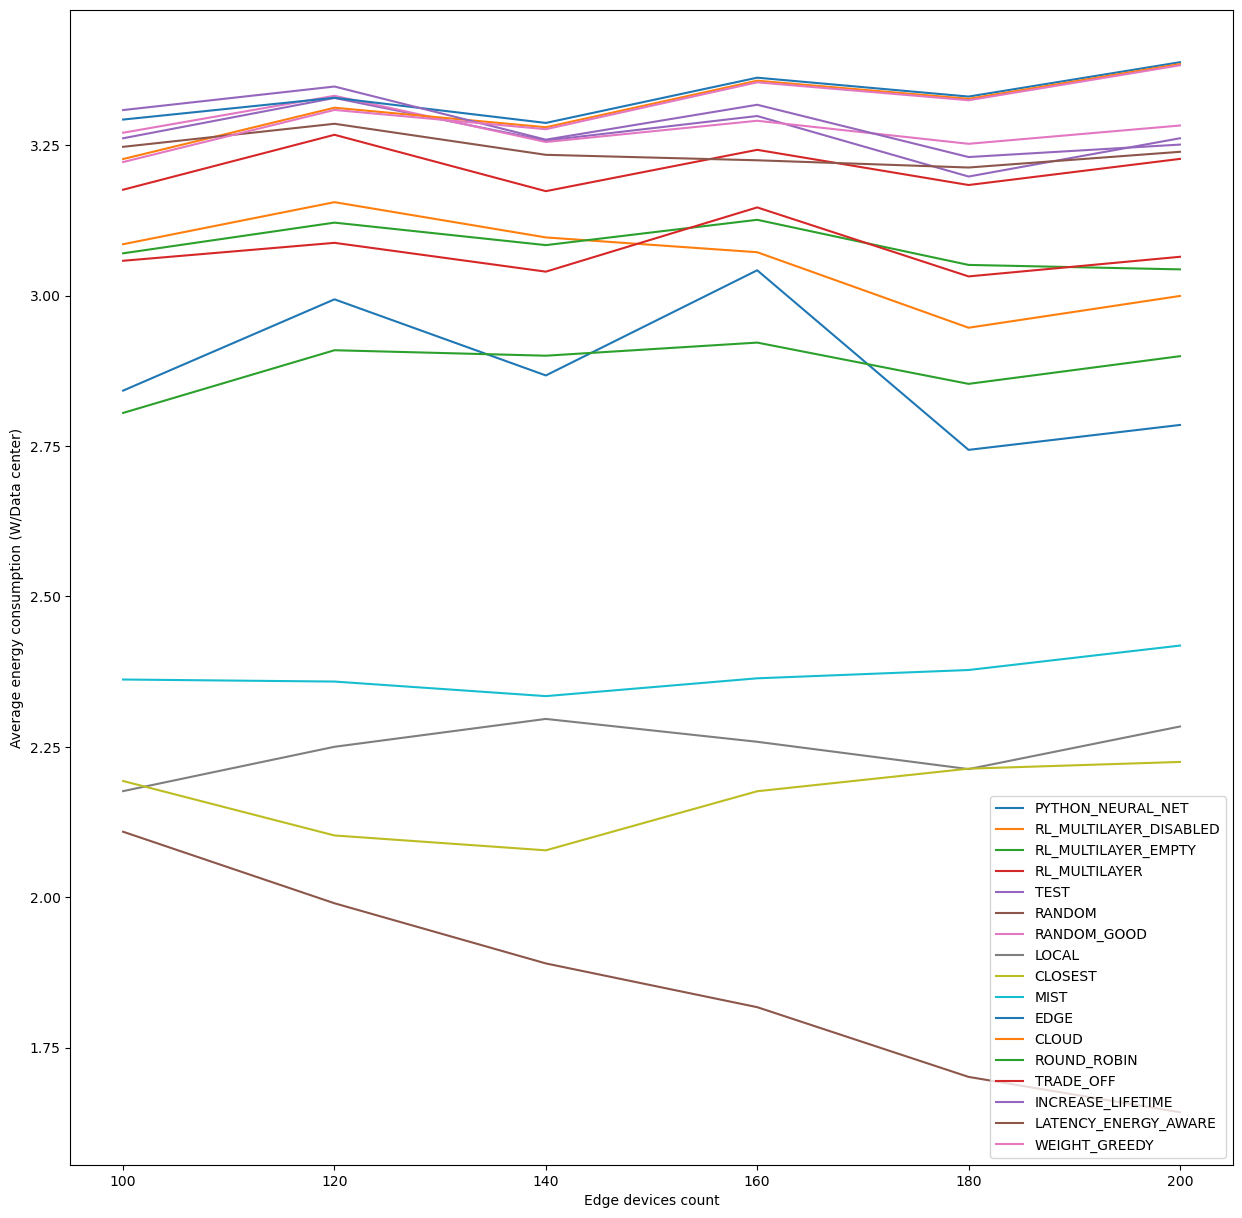

In [12]:
# ax.legend()



